#PARTE A:
1. Implementar un modelo CNN / DL propio y aplicar técnicas de Análisis Exploratorio (EDA) y de optimización (Fine-Tuning), incluyendo nuevas imágenes que contengan 1, 2 o más objetos- e incrementode volumen utilizando técnicas de DA.
2. Desarrollo un análisis de resultados, formule e implemente mejoras a los resultados de desempeño .

#Pasos Realizados.
1. Descargar Fotos

2. Etiquetar (Makesense.ai)

3. Subir archivos a drive

4. Abrir nuevo notebook (conectar al drive)

5. Cargar datos

6. Estandarizar y recortado de imagenes

7. Preparar los datos train y test (80% y 20% respectivamente)

8. Aplicar one hot encoding (formato binario para su posterior
procesamiento)

9. Aplicar arquitectura y configuración de hiperparametros. (modelo original)

10. Implementar métricas y gráficos para su posterior análisis.

11. Aplicar data augmentation a modelo original (se mantiene
hiperparametros)

12. Implementar métricas y gráficos para su posterior análisis.
Análisis y comparación de modelos.

13. Aplicar modelos preentrenados utilizando tambien data augmentation.

14. Probar diferentes capas (Ultimas capas)

15. Implementar métricas y gráficos para su posterior análisis.
Análisis y comparación de modelos.

16. Conclusion.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Cargar archivos CSV

> Se ha elegido para la creación del dataset el conjunto de productos de supermercado


In [ ]:
import pandas as pd
import os

# Crea una lista para almacenar todos los DataFrames
etiquetas = []

# Lista de nombres de archivo CSV

producto_bebe = '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/productos de bebes/labels_my-project-name_2023-10-28-12-51-25.csv'
limpieza= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/limpieza2/labels_my-project-name_2023-10-27-03-52-40.csv'
ropa= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/ropa/labels_my-project-name_2023-10-27-03-31-00.csv'
juguetes= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/juguete/labels_my-project-name_2023-10-27-03-40-29.csv'
producto_cuidado= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/Productos de cuidado/labels_my-project-name_2023-10-28-03-39-56.csv'
bateria_de_cocina= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/Baterias de cocina/labels_my-project-name_2023-10-28-02-07-51.csv'
electrodomesticos='/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/Electrodomesticos/labels_my-project-name_2023-10-28-12-30-41.csv'
dispositivos= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/dispositivos/labels_my-project-name_2023-10-28-12-20-11.csv'
suministro_mascota= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/Comida de perros/labels_my-project-name_2023-10-28-02-28-06.csv'
papeleria='/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/papeleria/labels_my-project-name_2023-10-27-05-35-29.csv'
jardineria='/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/jardineria/labels_my-project-name_2023-10-27-11-38-17.csv'
instrumentos= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/instrumento/labels_my-project-name_2023-10-27-06-22-18.csv'

file_list = [producto_bebe,limpieza,ropa,juguetes,producto_cuidado,bateria_de_cocina,electrodomesticos,dispositivos,suministro_mascota,papeleria,jardineria,instrumentos]

for filename in file_list:
    df = pd.read_csv(filename)
    etiquetas.append(df)

# Combina los DataFrames en uno solo
etiquetas = pd.concat(etiquetas, ignore_index=True)


In [ ]:
etiquetas

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,productos de bebes,707,109,217,756,productos de bebes01.jpg,1000,1000
1,productos de bebes,507,301,205,574,productos de bebes01.jpg,1000,1000
2,productos de bebes,507,569,417,965,productos de bebes02.jpg,1900,1900
3,productos de bebes,176,97,151,381,productos de bebes03.jpeg,600,600
4,productos de bebes,104,266,398,398,productos de bebes04.jpg,1058,950
...,...,...,...,...,...,...,...,...
1269,instrumento,24,253,950,497,instrumento95.jpg,1000,1000
1270,instrumento,50,73,584,531,instrumento96.jpg,675,675
1271,instrumento,49,158,1116,494,instrumento97.jpg,1199,800
1272,instrumento,26,396,1473,786,instrumento98.jpg,1500,1500


# Estandarizado y recortado de las imagenes

La función cargar_y_recortar_fotos carga imágenes y etiquetas, recorta las regiones de interés basadas en las etiquetas proporcionadas y devuelve las imágenes recortadas junto con sus etiquetas correspondientes para su uso en el entrenamiento de modelos de reconocimiento de objetos.

Se define rutas de directorio para diferentes categorías de productos de supermercado. Luego, utiliza la función cargar_y_recortar_fotos para cargar, recortar y etiquetar las imágenes de estos directorios. Finalmente, normaliza las imágenes dividiendo cada píxel por 255.0.

Los mensajes de error indican que hubo problemas al recortar ciertas imágenes. Estos problemas pueden estar relacionados con coordenadas de corte incorrectas o imágenes no válidas en los directorios proporcionados.


In [ ]:
import pandas as pd
import os
import cv2
import numpy as np

def cargar_y_recortar_fotos(etiquetas, directorios_imagenes, ancho, alto):
    fotos_recortadas = []
    etiquetas_recortadas = []

    for directorio_imagenes_actual in directorios_imagenes:
        archivos = os.listdir(directorio_imagenes_actual)

        for archivo in archivos:
            imagen_path = os.path.join(directorio_imagenes_actual, archivo)

            if os.path.isfile(imagen_path):
                try:
                    imagen = cv2.imread(imagen_path)
                    etiquetas_imagen = etiquetas[etiquetas['image_name'] == archivo]

                    for index, etiqueta in etiquetas_imagen.iterrows():
                        x, y, w, h = etiqueta['bbox_x'], etiqueta['bbox_y'], etiqueta['bbox_width'], etiqueta['bbox_height']
                        if x >= 0 and y >= 0 and w > 0 and h > 0:
                            imagen_recortada = imagen[y:y+h, x:x+w]
                            if not imagen_recortada.size == 0:
                                imagen_recortada = cv2.resize(imagen_recortada, (ancho, alto), interpolation=cv2.INTER_CUBIC)
                                fotos_recortadas.append(imagen_recortada)
                                etiquetas_recortadas.append(etiqueta['label_name'])  # Guarda la etiqueta
                            else:
                                print(f"Error al recortar imagen: {archivo}")
                        else:
                            print(f"Coordenadas no válidas para la imagen: {archivo}")
                except Exception as e:
                    print(f"Error al procesar imagen: {archivo}, Error: {str(e)}")
            else:
                print(f"Imagen no encontrada: {imagen_path}")

    return np.array(fotos_recortadas), etiquetas_recortadas


In [ ]:

ancho = 224
alto = 224


producto_bebe = '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/productos de bebes'
limpieza = '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/limpieza2'
ropa = '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/ropa/Ropa'
juguetes = '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/juguete'
producto_cuidado = '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/Productos de cuidado'
bateria_de_cocina = '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/Baterias de cocina'
electrodomesticos = '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/Electrodomesticos'
dispositivos= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/dispositivos'
suministro_mascota= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/Comida de perros'
papeleria= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/papeleria'
jardineria= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/jardineria'
instrumentos= '/content/drive/MyDrive/Colab Notebooks/LAB 2 Y 3 IA/Fotos y archivos CSV 2/instrumento'

directorios_imagenes = [producto_bebe,limpieza,ropa,juguetes,producto_cuidado,bateria_de_cocina,electrodomesticos,dispositivos,suministro_mascota,papeleria,jardineria,instrumentos]

fotos_recortadas, etiquetas_recortadas = cargar_y_recortar_fotos(etiquetas, directorios_imagenes, ancho, alto)

# Normaliza las imágenes dividiendo cada píxel por 255
fotos_recortadas = fotos_recortadas / 255.0



Coordenadas no válidas para la imagen: productos de bebes48.jpg
Error al procesar imagen: Electrodomestico 80.jpg, Error: 'NoneType' object is not subscriptable
Coordenadas no válidas para la imagen: instrumento06.jpg


In [ ]:
# Imprime la cantidad de fotos recortadas
print(f"Cantidad de fotos recortadas: {len(fotos_recortadas)}")

Cantidad de fotos recortadas: 1271


# Fotos recortadas y estandarizadas

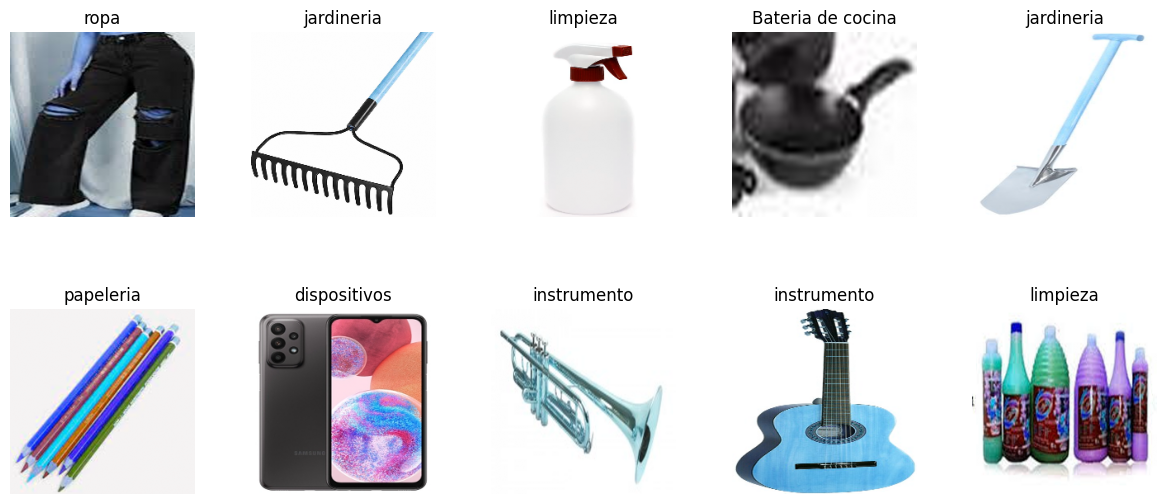

In [ ]:
import matplotlib.pyplot as plt
import random

# En este caso, seleccionaremos 10 índices de manera aleatoria
indices_aleatorios = random.sample(range(len(fotos_recortadas)), 10)

# Obtén las imágenes y etiquetas correspondientes a los índices seleccionados
images_view = [fotos_recortadas[i] for i in indices_aleatorios]
etiquetas_view = [etiquetas_recortadas[i] for i in indices_aleatorios]

# Configura la visualización de las imágenes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.5)
for i, (imagen, etiqueta) in enumerate(zip(images_view, etiquetas_view)):
    ax = axes[i // 5, i % 5]
    ax.imshow(imagen)
    ax.set_title(etiqueta)
    ax.axis('off')

plt.show()

In [ ]:
images_view = []
etiquetas_view = []

In [ ]:
etiquetas.shape

(1274, 8)

In [ ]:
fotos_recortadas[0].shape

(224, 224, 3)

In [ ]:
etiquetas

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,productos de bebes,707,109,217,756,productos de bebes01.jpg,1000,1000
1,productos de bebes,507,301,205,574,productos de bebes01.jpg,1000,1000
2,productos de bebes,507,569,417,965,productos de bebes02.jpg,1900,1900
3,productos de bebes,176,97,151,381,productos de bebes03.jpeg,600,600
4,productos de bebes,104,266,398,398,productos de bebes04.jpg,1058,950
...,...,...,...,...,...,...,...,...
1269,instrumento,24,253,950,497,instrumento95.jpg,1000,1000
1270,instrumento,50,73,584,531,instrumento96.jpg,675,675
1271,instrumento,49,158,1116,494,instrumento97.jpg,1199,800
1272,instrumento,26,396,1473,786,instrumento98.jpg,1500,1500


In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
    fotos_recortadas, etiquetas_recortadas, test_size=0.2, random_state=42
)


In [ ]:
y_train[:10]

['limpieza',
 'jardineria',
 'jardineria',
 'ropa',
 'dispositivos',
 'instrumento',
 'jardineria',
 'juguete',
 'jardineria',
 'ropa']

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Define una instancia de LabelBinarizer
label_binarizer = LabelBinarizer()

# Ajusta el LabelBinarizer a tus etiquetas
label_binarizer.fit(y_train)

# Transforma tus etiquetas en vectores one-hot
y_train_one_hot = label_binarizer.transform(y_train)
y_test_one_hot = label_binarizer.transform(y_test)



Se dividen los datos en una proporción de 80% para los de entrenamiento y 20% para los de prueba, ademas se hace una transformacion de las etiquetas de texto en vectores one-hot encoding. Los vectores one-hot representan las clases de las etiquetas en un formato binario para su posterior procesamiento en modelos de aprendizaje automático.

#Antes del onehot encoding

In [ ]:
y_train[1]

'jardineria'

# Despues del onehot encoding


In [ ]:
y_train_one_hot[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
class_names = label_binarizer.classes_
print(class_names)

['Bateria de cocina' 'Comida de perro' 'Electrodomestico'
 'Productos de cuidado' 'dispositivos' 'instrumento' 'jardineria'
 'juguete' 'limpieza' 'papeleria' 'productos de bebes' 'ropa']


In [ ]:
class_names_list = class_names.tolist()

In [ ]:
# Obtenemos el tamaño del conjunto de entrenamiento
n_train = len(X_train)

# Obtenemos el tamaño del conjunto de prueba
n_test = len(X_test)

print("Tamaño del conjunto de entrenamiento:", n_train)
print("Tamaño del conjunto de prueba:", n_test)


Tamaño del conjunto de entrenamiento: 1016
Tamaño del conjunto de prueba: 255


In [ ]:
len(y_train_one_hot)

1016

#Equilibrio de datos.

Se puede visualizar que el conjunto de datos esta equilibrado, hay algunas clases las cuales tienen un porcentaje mas de datos pero no son los suficientes como para decir que hay un desquilibrio de clases.

In [ ]:
from sklearn.utils import resample
from collections import Counter

# Encuentra la clase con el menor número de ejemplos
counter = Counter(etiquetas_recortadas)
counter


Counter({'productos de bebes': 133,
         'limpieza': 97,
         'ropa': 100,
         'juguete': 99,
         'Productos de cuidado': 100,
         'Bateria de cocina': 100,
         'Electrodomestico': 99,
         'dispositivos': 119,
         'Comida de perro': 100,
         'papeleria': 122,
         'jardineria': 102,
         'instrumento': 100})

In [ ]:
counter = Counter(y_train)
counter

Counter({'limpieza': 77,
         'jardineria': 84,
         'ropa': 75,
         'dispositivos': 98,
         'instrumento': 77,
         'juguete': 75,
         'papeleria': 100,
         'Bateria de cocina': 74,
         'Comida de perro': 84,
         'productos de bebes': 107,
         'Electrodomestico': 81,
         'Productos de cuidado': 84})

In [ ]:
counter = Counter (y_test)
counter

Counter({'instrumento': 23,
         'juguete': 24,
         'papeleria': 22,
         'dispositivos': 21,
         'productos de bebes': 26,
         'Bateria de cocina': 26,
         'jardineria': 18,
         'ropa': 25,
         'Productos de cuidado': 16,
         'Comida de perro': 16,
         'limpieza': 20,
         'Electrodomestico': 18})

#Arquitectura

Arquitectura del Modelo: capas convolucionales y de pooling repetidas antes de las capas densas, lo que suele conducir a un mejor rendimiento en problemas de visión por computadora.

Learning Rate: learning rate del optimizador Adam a 0.0001.

EarlyStopping: Se ha cambiado el EarlyStopping con una paciencia de 5. Para monitorear la pérdida (val_loss) en lugar de la precisión (val_accuracy). Esto se debe a que la pérdida es una métrica más sensible y directa del rendimiento del modelo en problemas de clasificación.

Batch Size y Épocas: tamaño del lote (batch_size) a 64 y el número de épocas a 16.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Crear el modelo
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(ancho, alto, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # Ajusta el número de neuronas según la cantidad de clases
])

# Configurar el optimizador con el learning rate específico
optimizer = Adam(learning_rate=0.0001)

# Compilar el modelo
model.compile(optimizer=optimizer,  # Utiliza el optimizador Adam con learning rate 0.0001
              loss='categorical_crossentropy',  # Usar categorical cross-entropy para problemas de clasificación multiclase
              metrics=['accuracy'])

# Configurar EarlyStopping con 'loss' como métrica para monitorear
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitoriza la pérdida en el conjunto de validación.
    mode='min',           # El objetivo es minimizar la pérdida.
    patience=5,           # El entrenamiento se detendrá después de 5 épocas sin mejora en la pérdida.
    verbose=1             # Mostrar mensajes de registro para el progreso del entrenamiento.
)


#Graficos y seguimiento

Se utiliza la clase metricscallback con la intencion de monitorear por epocas las metricas seleccionada, en este caso precision - recall - f1-score

Epoch 1/16
 6/16 [==========>...................] - ETA: 1s - loss: 4.2652 - accuracy: 0.1042

8/8 [==============================] - 1s 53ms/step
Época 1:
Bateria de cocina: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Comida de perro: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Electrodomestico: Precision=0.2727, Recall=0.5000, F1-score=0.3529
Productos de cuidado: Precision=0.0000, Recall=0.0000, F1-score=0.0000
dispositivos: Precision=0.8333, Recall=0.2381, F1-score=0.3704
instrumento: Precision=0.0000, Recall=0.0000, F1-score=0.0000
jardineria: Precision=0.0000, Recall=0.0000, F1-score=0.0000
juguete: Precision=0.0000, Recall=0.0000, F1-score=0.0000
limpieza: Precision=0.0000, Recall=0.0000, F1-score=0.0000
papeleria: Precision=0.0000, Recall=0.0000, F1-score=0.0000
productos de bebes: Precision=0.1204, Recall=1.0000, F1-score=0.2149
ropa: Precision=0.0000, Recall=0.0000, F1-score=0.0000
16/16 [==============================] - 18s 347ms/step - loss: 3.3854 - accuracy: 0.1033 - val_loss: 2.4820 - val_accuracy: 0.1569
Epoch 2/16
 1/16 [>.............................

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 14ms/step
Época 2:
Bateria de cocina: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Comida de perro: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Electrodomestico: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Productos de cuidado: Precision=0.0000, Recall=0.0000, F1-score=0.0000
dispositivos: Precision=0.5000, Recall=0.4762, F1-score=0.4878
instrumento: Precision=0.0000, Recall=0.0000, F1-score=0.0000
jardineria: Precision=0.0909, Recall=0.2222, F1-score=0.1290
juguete: Precision=0.0000, Recall=0.0000, F1-score=0.0000
limpieza: Precision=0.0000, Recall=0.0000, F1-score=0.0000
papeleria: Precision=0.0973, Recall=0.8182, F1-score=0.1739
productos de bebes: Precision=0.1667, Recall=0.0385, F1-score=0.0625
ropa: Precision=0.0000, Recall=0.0000, F1-score=0.0000
16/16 [==============================] - 3s 161ms/step - loss: 2.4535 - accuracy: 0.1447 - val_loss: 2.4801 - val_accuracy: 0.1294
Epoch 3/16
 1/16 [>.............................]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 13ms/step
Época 3:
Bateria de cocina: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Comida de perro: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Electrodomestico: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Productos de cuidado: Precision=0.0000, Recall=0.0000, F1-score=0.0000
dispositivos: Precision=0.4595, Recall=0.8095, F1-score=0.5862
instrumento: Precision=0.0000, Recall=0.0000, F1-score=0.0000
jardineria: Precision=0.0714, Recall=0.0556, F1-score=0.0625
juguete: Precision=0.0000, Recall=0.0000, F1-score=0.0000
limpieza: Precision=1.0000, Recall=0.0500, F1-score=0.0952
papeleria: Precision=0.0645, Recall=0.0909, F1-score=0.0755
productos de bebes: Precision=0.1412, Recall=0.9231, F1-score=0.2449
ropa: Precision=0.0000, Recall=0.0000, F1-score=0.0000
16/16 [==============================] - 2s 158ms/step - loss: 2.4413 - accuracy: 0.1545 - val_loss: 2.4697 - val_accuracy: 0.1765
Epoch 4/16
 1/16 [>.............................]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 13ms/step
Época 4:
Bateria de cocina: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Comida de perro: Precision=0.3333, Recall=0.0625, F1-score=0.1053
Electrodomestico: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Productos de cuidado: Precision=0.0000, Recall=0.0000, F1-score=0.0000
dispositivos: Precision=0.3953, Recall=0.8095, F1-score=0.5312
instrumento: Precision=0.0000, Recall=0.0000, F1-score=0.0000
jardineria: Precision=0.0952, Recall=0.3333, F1-score=0.1481
juguete: Precision=0.0000, Recall=0.0000, F1-score=0.0000
limpieza: Precision=0.0000, Recall=0.0000, F1-score=0.0000
papeleria: Precision=0.0333, Recall=0.0455, F1-score=0.0385
productos de bebes: Precision=0.0948, Recall=0.4231, F1-score=0.1549
ropa: Precision=0.0000, Recall=0.0000, F1-score=0.0000
16/16 [==============================] - 2s 158ms/step - loss: 2.3944 - accuracy: 0.1850 - val_loss: 2.4382 - val_accuracy: 0.1412
Epoch 5/16
 1/16 [>.............................]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 13ms/step
Época 5:
Bateria de cocina: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Comida de perro: Precision=0.3158, Recall=0.3750, F1-score=0.3429
Electrodomestico: Precision=1.0000, Recall=0.0556, F1-score=0.1053
Productos de cuidado: Precision=0.0000, Recall=0.0000, F1-score=0.0000
dispositivos: Precision=0.4474, Recall=0.8095, F1-score=0.5763
instrumento: Precision=1.0000, Recall=0.0435, F1-score=0.0833
jardineria: Precision=0.1000, Recall=0.7778, F1-score=0.1772
juguete: Precision=0.3333, Recall=0.0417, F1-score=0.0741
limpieza: Precision=1.0000, Recall=0.0500, F1-score=0.0952
papeleria: Precision=0.1020, Recall=0.2273, F1-score=0.1408
productos de bebes: Precision=0.0000, Recall=0.0000, F1-score=0.0000
ropa: Precision=1.0000, Recall=0.1200, F1-score=0.2143
16/16 [==============================] - 3s 161ms/step - loss: 2.2930 - accuracy: 0.2057 - val_loss: 2.3594 - val_accuracy: 0.1922
Epoch 6/16
 1/16 [>.............................]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 13ms/step
Época 6:
Bateria de cocina: Precision=1.0000, Recall=0.0385, F1-score=0.0741
Comida de perro: Precision=0.4000, Recall=0.3750, F1-score=0.3871
Electrodomestico: Precision=1.0000, Recall=0.0556, F1-score=0.1053
Productos de cuidado: Precision=0.0000, Recall=0.0000, F1-score=0.0000
dispositivos: Precision=0.4250, Recall=0.8095, F1-score=0.5574
instrumento: Precision=0.2667, Recall=0.1739, F1-score=0.2105
jardineria: Precision=0.1120, Recall=0.7778, F1-score=0.1958
juguete: Precision=0.7500, Recall=0.1250, F1-score=0.2143
limpieza: Precision=0.5000, Recall=0.0500, F1-score=0.0909
papeleria: Precision=0.0000, Recall=0.0000, F1-score=0.0000
productos de bebes: Precision=0.0455, Recall=0.0769, F1-score=0.0571
ropa: Precision=1.0000, Recall=0.1600, F1-score=0.2759
16/16 [==============================] - 3s 161ms/step - loss: 2.1820 - accuracy: 0.2441 - val_loss: 2.2866 - val_accuracy: 0.2078
Epoch 7/16
8/8 [==============================] -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8/8 [==============================] - 0s 13ms/step
Época 8:
Bateria de cocina: Precision=0.7143, Recall=0.1923, F1-score=0.3030
Comida de perro: Precision=0.2500, Recall=0.5625, F1-score=0.3462
Electrodomestico: Precision=0.5556, Recall=0.2778, F1-score=0.3704
Productos de cuidado: Precision=0.0000, Recall=0.0000, F1-score=0.0000
dispositivos: Precision=0.4146, Recall=0.8095, F1-score=0.5484
instrumento: Precision=0.5000, Recall=0.5652, F1-score=0.5306
jardineria: Precision=0.3333, Recall=0.3333, F1-score=0.3333
juguete: Precision=0.5385, Recall=0.2917, F1-score=0.3784
limpieza: Precision=1.0000, Recall=0.0500, F1-score=0.0952
papeleria: Precision=0.2143, Recall=0.4091, F1-score=0.2812
productos de bebes: Precision=0.3404, Recall=0.6154, F1-score=0.4384
ropa: Precision=0.5000, Recall=0.2800, F1-score=0.3590
16/16 [==============================] - 3s 161ms/step - loss: 1.9650 - accuracy: 0.3209 - val_loss: 2.0966 - val_accuracy: 0.3725
Epoch 9/16
8/8 [==============================] -

<Figure size 1200x600 with 0 Axes>

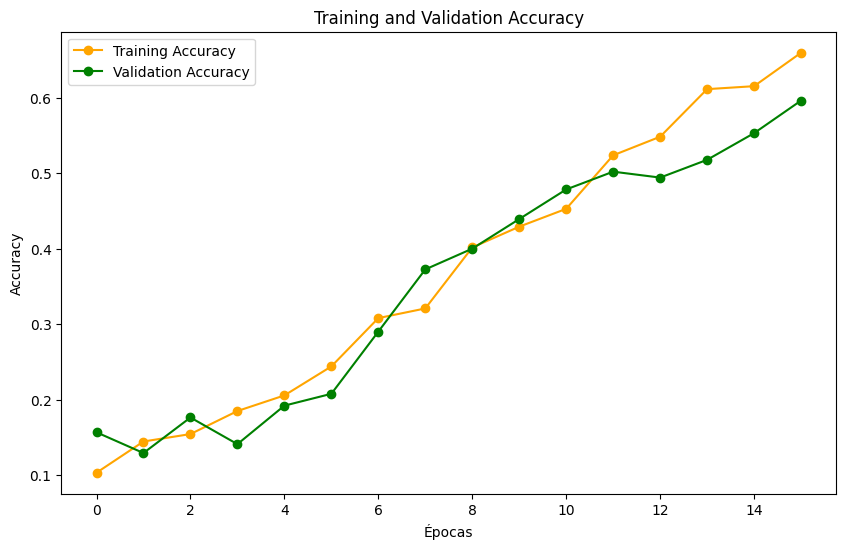

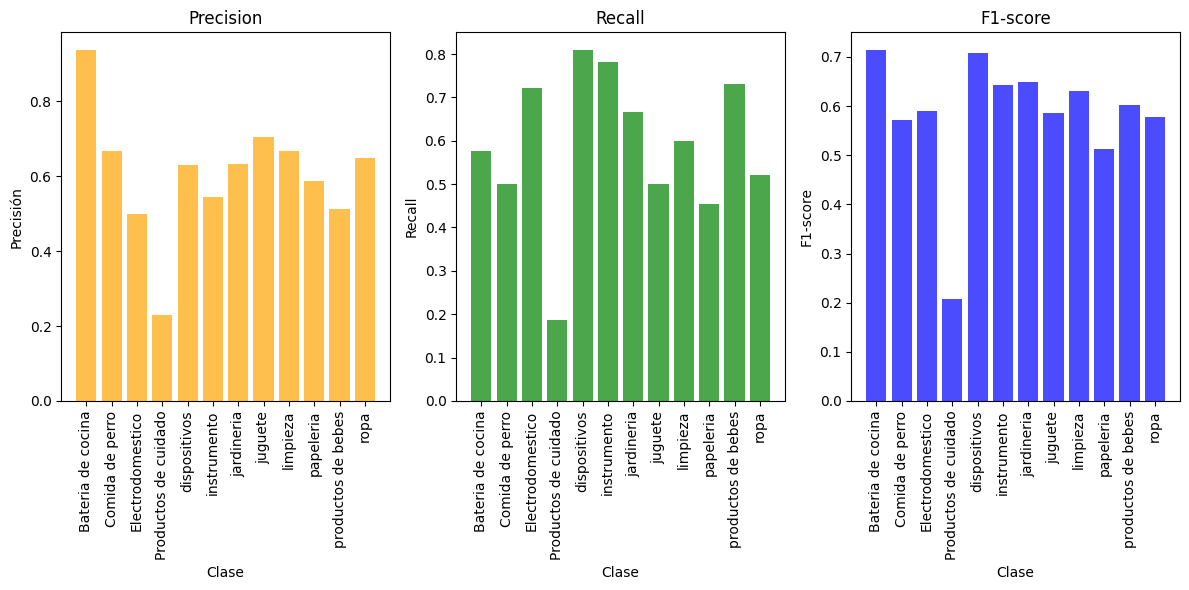

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

epochs = 16
batch_size = 64

class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_train, y_train_one_hot, x_val, y_val, class_names):
        super(MetricsCallback, self).__init__()
        self.X_train = X_train
        self.y_train_one_hot = y_train_one_hot
        self.x_val = x_val
        self.y_val = y_val
        self.class_names = class_names
        self.metrics_history = {'precision': [], 'recall': [], 'f1-score': []}

    def on_epoch_end(self, epoch, logs=None):
        # Obtener las métricas de precisión, recall y F1-score para el conjunto de validación
        y_pred = self.model.predict(self.x_val)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true = np.argmax(self.y_val, axis=1)
        report = classification_report(y_true, y_pred_classes, target_names=self.class_names, output_dict=True)

        # Calcular y registrar las métricas para cada clase
        for class_name in self.class_names:
            precision = report[class_name]['precision']
            recall = report[class_name]['recall']
            f1 = report[class_name]['f1-score']
            self.metrics_history['precision'].append(precision)
            self.metrics_history['recall'].append(recall)
            self.metrics_history['f1-score'].append(f1)

        # Imprimir las métricas en cada época
        print(f'Época {epoch + 1}:')
        for idx, class_name in enumerate(self.class_names):
            precision = self.metrics_history['precision'][epoch * len(self.class_names) + idx]
            recall = self.metrics_history['recall'][epoch * len(self.class_names) + idx]
            f1 = self.metrics_history['f1-score'][epoch * len(self.class_names) + idx]
            print(f'{class_name}: Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}')

# Crear el objeto de callback
metrics_callback = MetricsCallback(X_train, y_train_one_hot, X_test, y_test_one_hot, class_names)

# Entrenar el modelo con el callback de métricas
history_model = model.fit(
    X_train, y_train_one_hot,
    epochs=epochs, batch_size=batch_size,
    validation_data=(X_test, y_test_one_hot), callbacks=[metrics_callback])

# Graficar accuracy para entrenamiento y validación por separado
plt.figure(figsize=(12, 6))

# Graficar accuracy para entrenamiento y validación en un solo gráfico
plt.figure(figsize=(10, 6))

# Accuracy entrenamiento
plt.plot(history_model.history['accuracy'], label='Training Accuracy', marker='o', color='orange')

# Accuracy validación
plt.plot(history_model.history['val_accuracy'], label='Validation Accuracy', marker='o', color='green')

plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Graficar las métricas de precisión, recall y F1-score con gráficos de barras
plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(1, 3, 1)
plt.bar(class_names, metrics_callback.metrics_history['precision'][-len(class_names):], color='orange', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Precisión')
plt.title('Precision')
plt.xticks(rotation='vertical')

# Recall
plt.subplot(1, 3, 2)
plt.bar(class_names, metrics_callback.metrics_history['recall'][-len(class_names):], color='green', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(rotation='vertical')

# F1-score
plt.subplot(1, 3, 3)
plt.bar(class_names, metrics_callback.metrics_history['f1-score'][-len(class_names):], color='blue', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('F1-score')
plt.title('F1-score')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()


Mejor Clase (Bateria de cocina y Dispositivos):

(Bateria de cocina)

* Precisión: 94%
* Recall: 58%
* F1-score: 71%

(Dispositivos)

* Precisión: 63%
* Recall: 81%
* F1-score: 71%


Peor Clase (Productos de cuidado):

Precisión: 23%
Recall: 19%
F1-score: 21%



Esta comparativa destaca la disparidad en el rendimiento del modelo entre las clases de Bateria de cocina, Dispositivos y Productos de Cuidado de la Piel. Mientras que el modelo tiene una buena precisión, recall y F1-score para la clase de Bateria de cocina y dispositivos, muestra un rendimiento muy bajo para la clase de Productos de Cuidado de la Piel. Esto indica que el modelo tiene dificultades para identificar correctamente los productos de cuidado de la piel en comparación con la clase de
Bateria de cocina y dispositivos



-----------------
#Matriz de confusión modelo original
Se puede observar que en la matriz de confusión hay problemas con la clase productos de cuidado con solomanete 3 predicciones correctamente. En base a esta matriz de confusión se pueden sacar las metricas de precisión - recall y f1 score.

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, x_test, y_test, class_names):
    # Usar el método predict del modelo para obtener las probabilidades de cada clase para cada imagen del conjunto de prueba
    predicted_classes = model.predict(x_test)

    # Convertir las probabilidades en etiquetas de clase numéricas
    predicted_classes = np.argmax(predicted_classes, axis=1)
    y_test_class = np.argmax(y_test, axis=1)

    # Crear la matriz de confusión
    matriz = metrics.confusion_matrix(y_test_class, predicted_classes)

    # Crear una figura con matplotlib
    plt.figure(figsize=(10, 10))

    # Graficar la matriz de confusión con seaborn
    sns.heatmap(matriz, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_names, yticklabels=class_names)

    # Añadir título y etiquetas
    plt.title('Matriz de confusión', y=1.005, size=15)
    plt.xlabel('Clase predicha')
    plt.ylabel('Clase real')

    # Mostrar la figura
    plt.show()

8/8 [==============================] - 0s 14ms/step


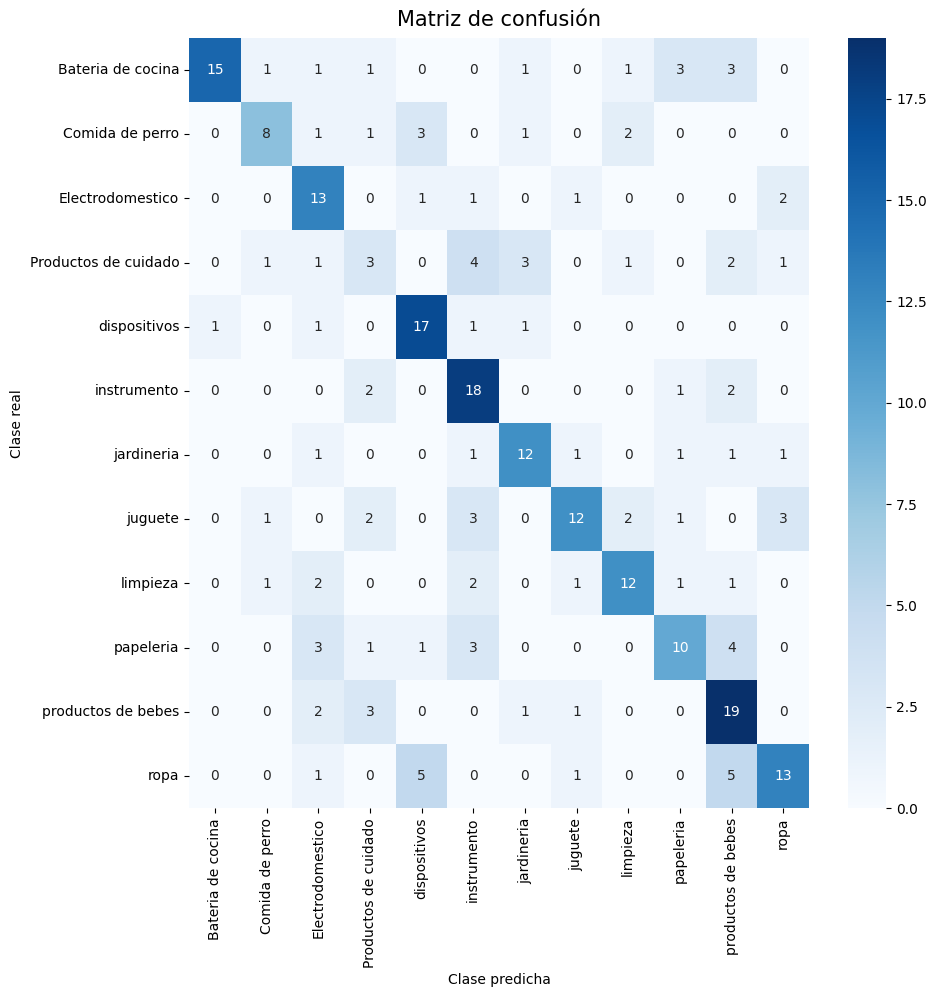

In [ ]:
# Uso de la función
plot_confusion_matrix(model, X_test, y_test_one_hot, class_names_list)

#Reporte

In [ ]:
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo en forma de clases (no one-hot encoded)
predicted_classes = np.argmax(model.predict(X_test), axis=1)

# Obtener el reporte de clasificación
reporte_clasificacion = classification_report(np.argmax(y_test_one_hot, axis=1), predicted_classes)

# Imprimir el reporte de clasificación
print(reporte_clasificacion)


8/8 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

           0       0.94      0.58      0.71        26
           1       0.67      0.50      0.57        16
           2       0.50      0.72      0.59        18
           3       0.23      0.19      0.21        16
           4       0.63      0.81      0.71        21
           5       0.55      0.78      0.64        23
           6       0.63      0.67      0.65        18
           7       0.71      0.50      0.59        24
           8       0.67      0.60      0.63        20
           9       0.59      0.45      0.51        22
          10       0.51      0.73      0.60        26
          11       0.65      0.52      0.58        25

    accuracy                           0.60       255
   macro avg       0.61      0.59      0.58       255
weighted avg       0.62      0.60      0.59       255



# Data augmentation (Utilizando el modelo anterior.)

Se utiliza la misma arquitectura que el modelo original con la intención de saber que tan influyente es la implementación de Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

epochs = 16
batch_size = 64

# Crea un objeto ImageDataGenerator con transformaciones de Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rango de rotación aleatoria de las imágenes (en grados)
    width_shift_range=0.1,  # Rango de traslación horizontal aleatoria (como fracción del ancho total)
    height_shift_range=0.1,  # Rango de traslación vertical aleatoria (como fracción de la altura total)
    zoom_range=0.1,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    vertical_flip=False,  # No aplicar volteo vertical
    fill_mode='nearest'  # Estrategia utilizada para rellenar píxeles después de una transformación
)

# Genera imágenes aumentadas a partir de los datos de entrenamiento
augmented_data = datagen.flow(X_train, y_train_one_hot, batch_size=batch_size)


early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitoriza la pérdida en el conjunto de entrenamiento.
    mode='min',      # El objetivo es minimizar la pérdida.
    patience=5,       # El entrenamiento se detendrá después de 5 épocas sin mejora en la pérdida.
    verbose=1         # Mostrar mensajes de registro para el progreso del entrenamiento.
)

# Entrenar el modelo con los datos aumentados
history_model_aug = model.fit(
    augmented_data,
    steps_per_epoch=len(X_train) // batch_size,  # Número de lotes por época
    epochs=epochs,
    validation_data=(X_test, y_test_one_hot),  # Datos de validación sin aumento
    callbacks=[metrics_callback,early_stopping]
)



Epoch 1/16
8/8 [==============================] - 0s 13ms/step
Época 1:
Bateria de cocina: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Comida de perro: Precision=0.0000, Recall=0.0000, F1-score=0.0000
Electrodomestico: Precision=0.2727, Recall=0.5000, F1-score=0.3529
Productos de cuidado: Precision=0.0000, Recall=0.0000, F1-score=0.0000
dispositivos: Precision=0.8333, Recall=0.2381, F1-score=0.3704
instrumento: Precision=0.0000, Recall=0.0000, F1-score=0.0000
jardineria: Precision=0.0000, Recall=0.0000, F1-score=0.0000
juguete: Precision=0.0000, Recall=0.0000, F1-score=0.0000
limpieza: Precision=0.0000, Recall=0.0000, F1-score=0.0000
papeleria: Precision=0.0000, Recall=0.0000, F1-score=0.0000
productos de bebes: Precision=0.1204, Recall=1.0000, F1-score=0.2149
ropa: Precision=0.0000, Recall=0.0000, F1-score=0.0000
15/15 [==============================] - 11s 722ms/step - loss: 1.7699 - accuracy: 0.4076 - val_loss: 1.5536 - val_accuracy: 0.5333
Epoch 2/16
8/8 [=====================

#Grafico de accuracy

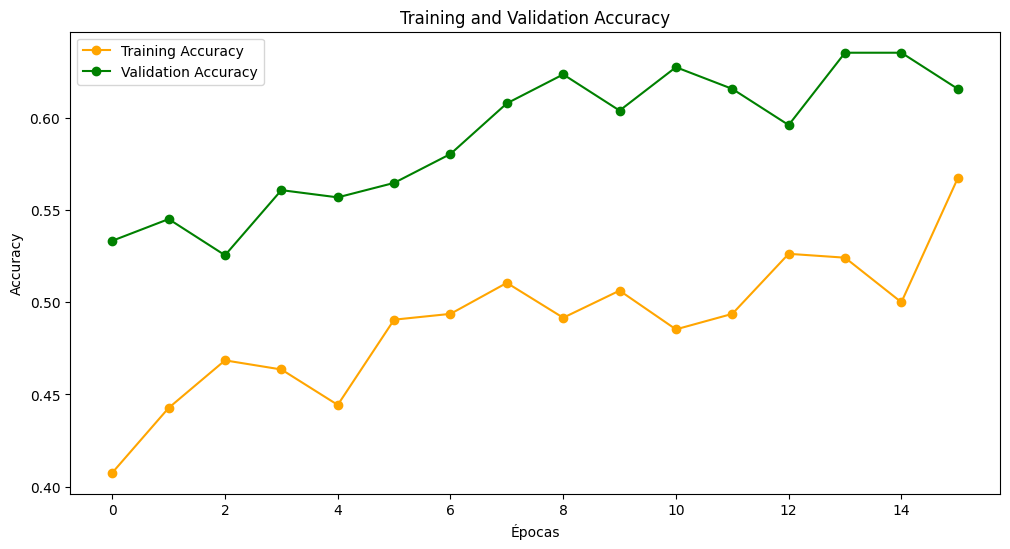

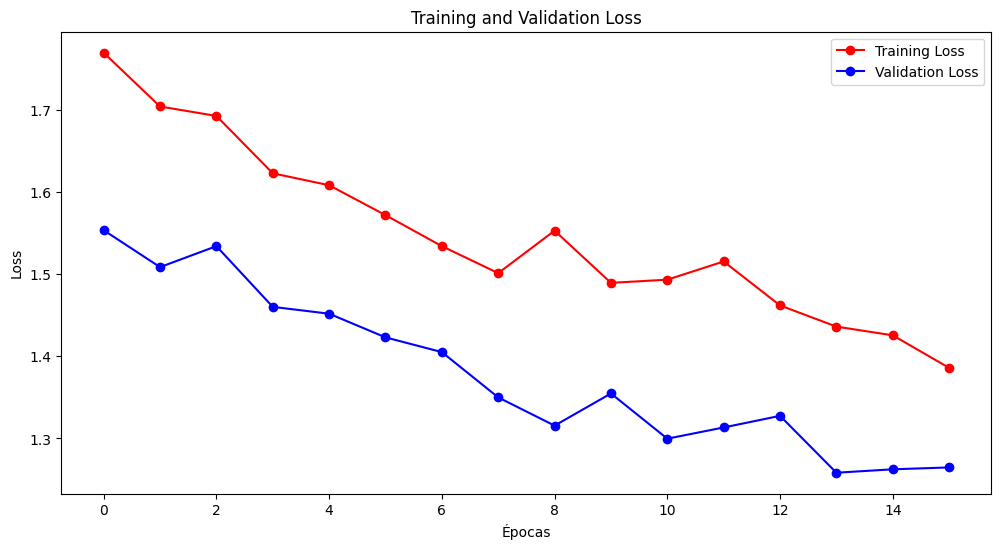

In [ ]:
import matplotlib.pyplot as plt

# Graficar accuracy para entrenamiento y validación
plt.figure(figsize=(12, 6))

# Accuracy entrenamiento
plt.plot(history_model_aug.history['accuracy'], label='Training Accuracy', marker='o', color='orange')

# Accuracy validación
plt.plot(history_model_aug.history['val_accuracy'], label='Validation Accuracy', marker='o', color='green')

plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Graficar pérdidas (loss) para entrenamiento y validación
plt.figure(figsize=(12, 6))

# Pérdida (loss) entrenamiento
plt.plot(history_model_aug.history['loss'], label='Training Loss', marker='o', color='red')

# Pérdida (loss) validación
plt.plot(history_model_aug.history['val_loss'], label='Validation Loss', marker='o', color='blue')

plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



#Matriz de confusión modelo DA

8/8 [==============================] - 0s 14ms/step


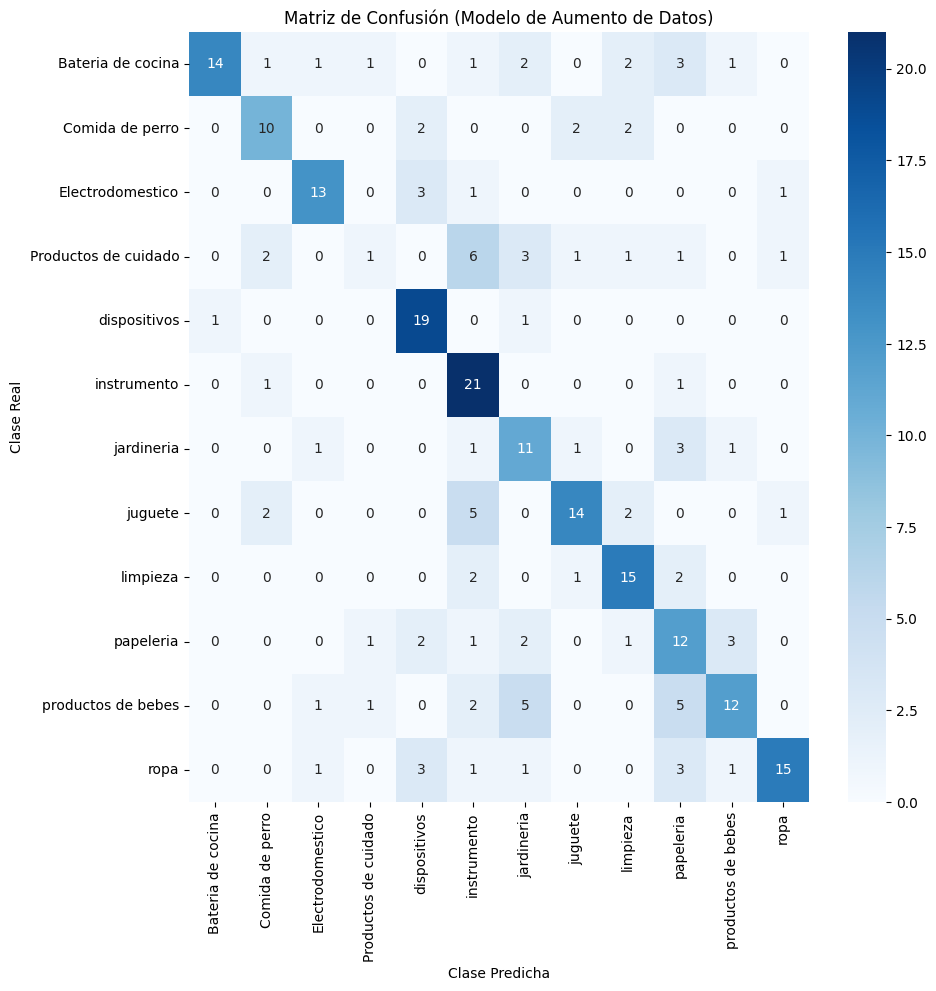

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las predicciones del modelo DA en forma de clases (no one-hot encoded)
predicted_classes_da = np.argmax(model.predict(X_test), axis=1)

# Obtener la matriz de confusión
confusion_mtx_da = confusion_matrix(np.argmax(y_test_one_hot, axis=1), predicted_classes_da)

# Crear una figura con matplotlib
plt.figure(figsize=(10, 10))

# Graficar la matriz de confusión con seaborn
sns.heatmap(confusion_mtx_da, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_names_list, yticklabels=class_names_list)

# Añadir título y etiquetas
plt.title('Matriz de Confusión (Modelo de Aumento de Datos)')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')

# Mostrar la figura
plt.show()


8/8 [==============================] - 0s 14ms/step


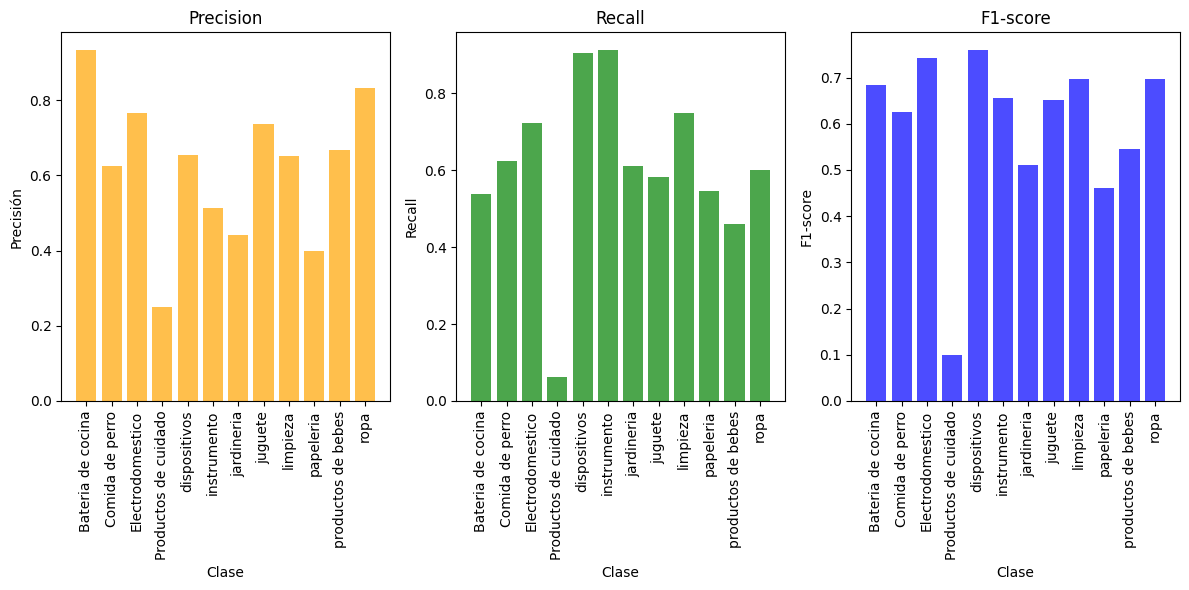

In [ ]:
# Obtener las predicciones del modelo en forma de clases (no one-hot encoded)
predicted_classes_aug = np.argmax(model.predict(X_test), axis=1)

from sklearn.metrics import precision_recall_fscore_support

# Calcular las métricas de precisión, recall y f1-score para cada clase
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test_one_hot, axis=1), predicted_classes_aug, average=None)

# Función para mostrar las métricas como gráficos de barra
def plot_metrics_bar(precision, recall, f1_score, class_names):
    plt.figure(figsize=(12, 6))
    x = range(len(class_names))

    plt.subplot(1, 3, 1)
    plt.bar(x, precision, color='orange', alpha=0.7)
    plt.xlabel('Clase')
    plt.ylabel('Precisión')
    plt.title('Precision')
    plt.xticks(x, class_names, rotation='vertical')

    plt.subplot(1, 3, 2)
    plt.bar(x, recall, color='green', alpha=0.7)
    plt.xlabel('Clase')
    plt.ylabel('Recall')
    plt.title('Recall')
    plt.xticks(x, class_names, rotation='vertical')

    plt.subplot(1, 3, 3)
    plt.bar(x, f1_score, color='blue', alpha=0.7)
    plt.xlabel('Clase')
    plt.ylabel('F1-score')
    plt.title('F1-score')
    plt.xticks(x, class_names, rotation='vertical')

    plt.tight_layout()
    plt.show()

# Llama a la función para mostrar los gráficos de barra de las métricas
plot_metrics_bar(precision, recall, f1_score, class_names)







In [ ]:
from sklearn.metrics import classification_report

# Obtener el reporte de clasificación con los nombres de las etiquetas
reporte_clasificacion_aug = classification_report(np.argmax(y_test_one_hot, axis=1), predicted_classes_aug, target_names=class_names_list)

# Imprimir el reporte de clasificación
print(reporte_clasificacion_aug)


                      precision    recall  f1-score   support

   Bateria de cocina       0.93      0.54      0.68        26
     Comida de perro       0.62      0.62      0.62        16
    Electrodomestico       0.76      0.72      0.74        18
Productos de cuidado       0.25      0.06      0.10        16
        dispositivos       0.66      0.90      0.76        21
         instrumento       0.51      0.91      0.66        23
          jardineria       0.44      0.61      0.51        18
             juguete       0.74      0.58      0.65        24
            limpieza       0.65      0.75      0.70        20
           papeleria       0.40      0.55      0.46        22
  productos de bebes       0.67      0.46      0.55        26
                ropa       0.83      0.60      0.70        25

            accuracy                           0.62       255
           macro avg       0.62      0.61      0.59       255
        weighted avg       0.64      0.62      0.61       255



Mejor Resultado (Dispositivos):

Modelo con Aumento de Datos (DA):

* Precisión: 66%
* Recall: 90%
* F1-Score: 76%

Primer Modelo sin Aumento de Datos:

* Precisión: 63%
* Recall: 81%
* F1-Score: 71%


Explicación:

* El modelo con aumento de datos (DA) supera al primer modelo en la clase Dispositivos en términos de precisión, recall y F1-score. Esto indica que el modelo DA es mejor para identificar productos en la categoría de Dispositivos. El aumento de datos ha ayudado al modelo a generalizar mejor patrones para esta clase específica.

Peor Resultado (Productos de cuidado):

* Precisión: 25%
* Recall: 6%
* F1-Score: 10%


Explicación:

* Tanto el modelo con aumento de datos como el primer modelo tienen un rendimiento muy deficiente en la clase de Producto de cuidado. Esto podría deberse a la falta de datos de entrenamiento de calidad para esta clases o a la complejidad inherente de las imágenes en estas categorías.

------------------
# PARTE B:

4. **Modelos Preentrenados:**
   - Utiliza modelos preentrenados, como AlexNet, GoogleNet, MobilenetV2, Densenet169, VGG19, InceptionV3, Resnet18, Resnet50, Faster RCNN, SSD, RetinaNet, Inception-Resnet-V2, que están disponibles en bibliotecas como TensorFlow y PyTorch.
   - Ajusta los modelos preentrenados a tus datos específicos. Esto puede requerir cambios en la capa de salida y la reentrenamiento de algunas capas.



### Fuentes de datos (MNIST,CIFAR100,ImageNeT,MS Coco,Pascal VOC (2012),Fashion MNIST)

ImageNet debido a su amplitud, diversidad y la efectividad probada de la transferencia de aprendizaje desde este conjunto de datos a una amplia variedad de tareas de clasificación de imágenes.

Se probo Mscoco y no funciono debido a que la mayoria de las arquitecturas se ha entrenado con imagenet



## 1. AlexNet (ImageNet), [PYTORCH]

## 2. MobileNetV2 (ImageNet)

Al utilizar MobileNetV2 con `weights='imagenet'`, se carga una versión de MobileNetV2 que se ha entrenado en el conjunto de datos de ImageNet. Con el argumento `include_top=False` no se  incluye la capa de salida original de MobileNetV2, sino que se van agregando capas de salida personalizadas para adaptarse a este problema.(La capa de salida original de MobileNetV2 es una capa densa que clasifica las imágenes en 1000 clases) en nuestro caso sera de 12 debido a que existen 12 etiquetas.

La arquitectura de las capas de salida personalizadas en conjunto con los hiperparametros se conforma de lo siguiente:

1)Capas Dropout (0.3 - 0.5), Capas BatchNormalization, ultima capa densa (salida = 12).

2)Learning Rate: learning rate del optimizador Adam a 0.0001.

3)EarlyStopping: Se ha cambiado el EarlyStopping para monitorear la pérdida (val_loss) en lugar de la precisión (val_accuracy). Esto se debe a que la pérdida es una métrica más sensible y directa del rendimiento del modelo en problemas de clasificación.

4)Batch Size y Épocas: tamaño del lote (batch_size) a 64 y el número de épocas a 50.

5) Se utiliza DA como es solicitado.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model

# Cargar el modelo preentrenado MobileNetV2 sin las capas superiores (top)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Crea un objeto ImageDataGenerator con transformaciones de Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rango de rotación aleatoria de las imágenes (en grados)
    width_shift_range=0.1,  # Rango de traslación horizontal aleatoria (como fracción del ancho total)
    height_shift_range=0.1,  # Rango de traslación vertical aleatoria (como fracción de la altura total)
    zoom_range=0.1,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    vertical_flip=False,  # No aplicar volteo vertical
    fill_mode='nearest'  # Estrategia utilizada para rellenar píxeles después de una transformación
)

# Genera imágenes aumentadas a partir de los datos de entrenamiento
augmented_data = datagen.flow(X_train, y_train_one_hot, batch_size=batch_size)


# Agregar capas adicionales para adaptar el modelo a tu problema
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
#x = Dropout(0.1)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)

predictions = Dense(12, activation='softmax')(x)  # num_classes es el número de clases en tu problema

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas base del modelo preentrenado
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configurar EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    verbose=1
)

history_MobileNetV2 = model.fit(
    augmented_data,
    steps_per_epoch=len(X_train) // batch_size,  # Número de lotes por época
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test_one_hot),  # Datos de validación sin aumento
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=class_names))



9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/50
15/15 [==============================] - 16s 680ms/step - loss: 3.3970 - accuracy: 0.1375 - val_loss: 2.2272 - val_accuracy: 0.3255
Epoch 2/50
15/15 [==============================] - 10s 668ms/step - loss: 2.5148 - accuracy: 0.2731 - val_loss: 1.9402 - val_accuracy: 0.5451
Epoch 3/50
15/15 [==============================] - 10s 644ms/step - loss: 1.9189 - accuracy: 0.4170 - val_loss: 1.6392 - val_accuracy: 0.7020
Epoch 4/50
15/15 [==============================] - 10s 648ms/step - loss: 1.5521 - accuracy: 0.5336 - val_loss: 1.3469 - val_accuracy: 0.8039
Epoch 5/50
15/15 [==============================] - 10s 656ms/step - loss: 1.2483 - accuracy: 0.6239 - val_loss: 1.0806 - val_accuracy: 0.8510
Epoch 6/50
15/15 [==============================] - 10s 652ms/step - loss: 1.0068 - accuracy: 0.6817 - val_loss: 0.8574 - val_accuracy: 0.8706
Epoch 7/50
15/15 [==============================] - 10s 664ms/step - loss: 0.95

#Grafico accuracy

Se puede observar el grafico de accuracy en el cual se presenta la curva de datos de entrenamiento como los de validación, el modelo indica que puede generalizar bien los datos y no se presenta un overffiting.

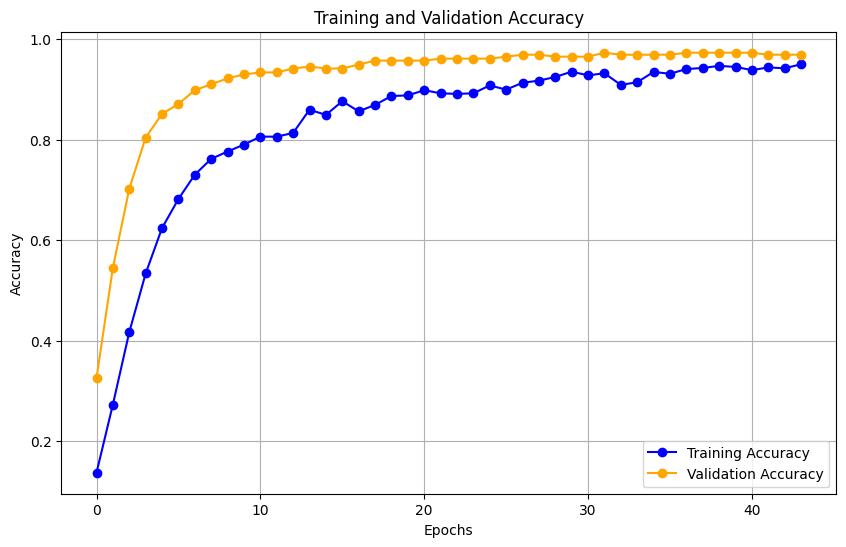

In [ ]:
import matplotlib.pyplot as plt

# Obtener la precisión del entrenamiento y la precisión de la validación desde history_MobileNetV2
train_accuracy = history_MobileNetV2.history['accuracy']
val_accuracy = history_MobileNetV2.history['val_accuracy']

# Crear un gráfico de precisión
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


#Matriz de confusión modelo MobileNetV2

Se puede observar que ha mejorado considerablemente la matriz de confusión respecto al modelo original y modelo con DA.
la mayoria de las clases tienen un alto rendimiento en predicciones correctas.

La clase que tiene peor desempeño seria Productos de cuidado de piel.

8/8 [==============================] - 0s 19ms/step


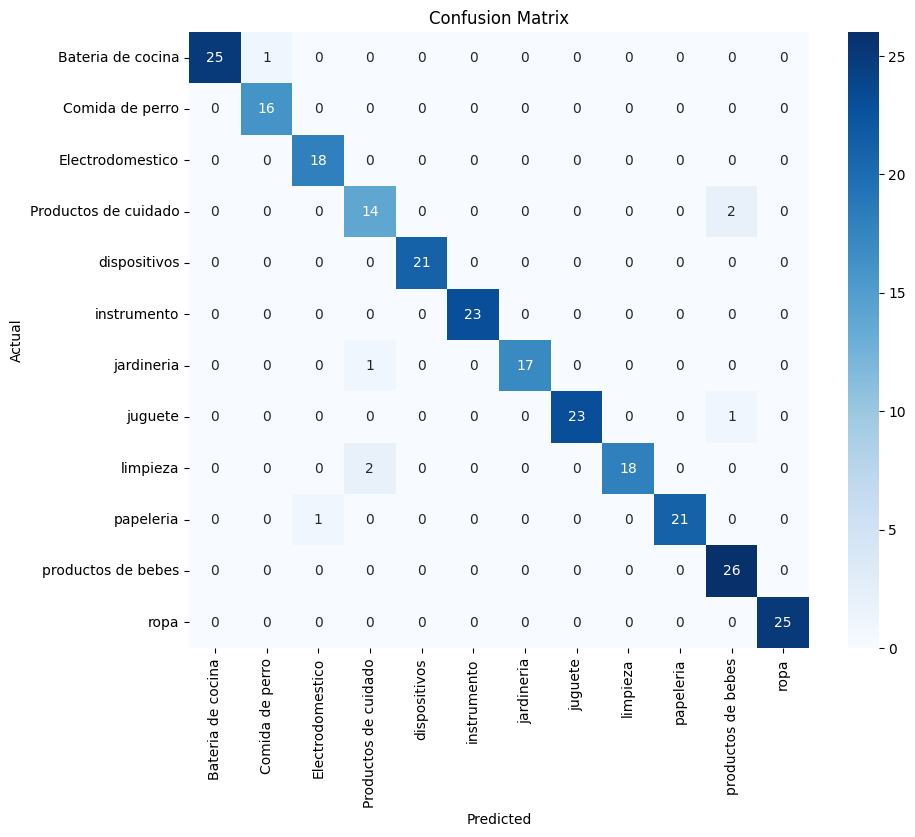

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en forma de clases (no one-hot encoded)
predicted_classes = np.argmax(model.predict(X_test), axis=1)

# Obtener la matriz de confusión
confusion_mtx = confusion_matrix(y_true, predicted_classes)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


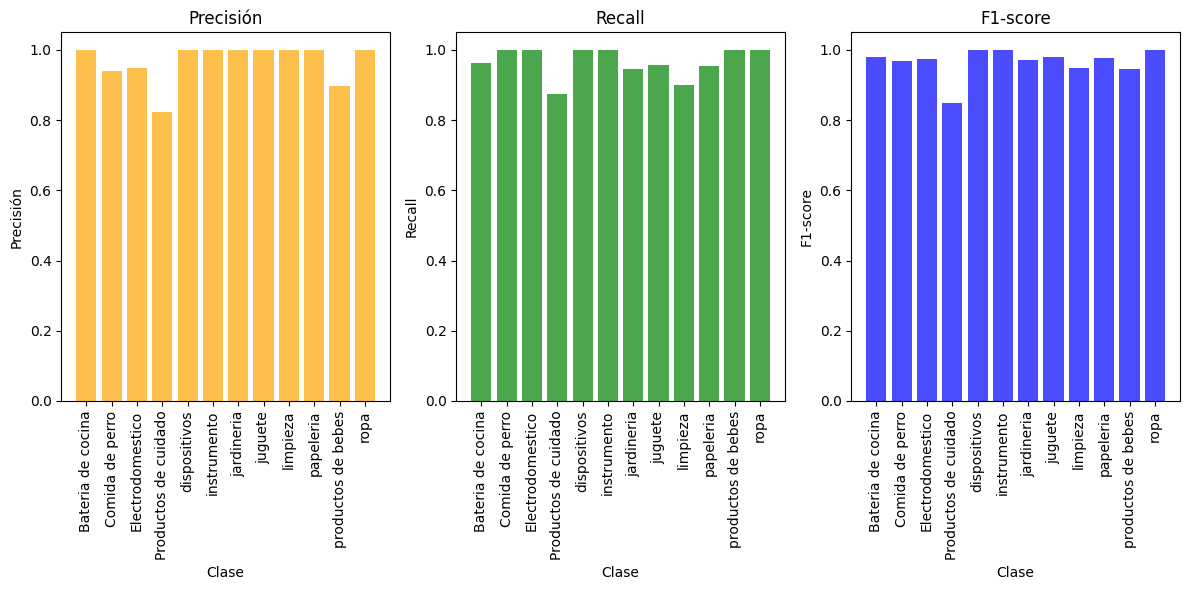

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)

# Obtener las métricas para cada clase
precision_values = [report[class_name]['precision'] for class_name in class_names]
recall_values = [report[class_name]['recall'] for class_name in class_names]
f1_score_values = [report[class_name]['f1-score'] for class_name in class_names]

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para precisión
plt.subplot(1, 3, 1)
plt.bar(class_names, precision_values, color='orange', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Precisión')
plt.title('Precisión')
plt.xticks(rotation='vertical')

# Gráfico de barras para recall
plt.subplot(1, 3, 2)
plt.bar(class_names, recall_values, color='green', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(rotation='vertical')

# Gráfico de barras para F1-score
plt.subplot(1, 3, 3)
plt.bar(class_names, f1_score_values, color='blue', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('F1-score')
plt.title('F1-score')
plt.xticks(rotation='vertical')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Comparación de Resultados:

Modelo Original (sin Data Augmentation):

* Precisión: Rango de 23% (Producto de cuidado) a 94% (Bateria de cocina).
* Recall: Rango de 19% (Producto de cuidado) a 81% (Dispositivos).
* F1-Score: Rango de 21% (Producto de cuidado) a 71% (Bateria de cocina y Dispositivos).

Accuracy: 60%

Modelo con Data Augmentation:

* Precisión: Rango de 25% (Producto de cuidado) a 93% (Bateria de cocina).
* Recall: Rango 6% (Productos de cuidado) a 91% (Instrumento).
* F1-Score: Rango de 10% (Producto de cuidado) a 76% (Dispositivos).

Accuracy: 62%

Modelo MobileNetV2 con Fine-Tuning:

* Precisión: Rango de 82% (Productos de cuidado) a 100% (Varias clases).
* Recall: Rango de 88% (Productos de cuidado) a 100% (Varias clases).
* F1-Score: Rango de 85% (Productos de cuidado) a 100% (Varias clases).

Accuracy: 97%


Análisis:

Modelo Original vs. Modelo con Data Augmentation:

Los resultados del modelo con Data Augmentation son ligeramente mejores que los del modelo original en términos de precisión, recall y F1-score.
A pesar de la introducción de variedad en los datos a través de la Data Augmentation, las mejoras son marginales, lo que sugiere que la variación introducida no es suficiente para mejorar significativamente el rendimiento del modelo.


Modelo con Data Augmentation vs. MobileNetV2 con Fine-Tuning:

El modelo MobileNetV2 con Fine-Tuning supera significativamente tanto al modelo original como al modelo con Data Augmentation en todas las métricas (precisión, recall, F1-score) y en la precisión global (accuracy).

MobileNetV2 con Fine-Tuning demuestra ser efectivo para esta tarea de clasificación, mostrando mejoras notables en la mayoría de las clases.

--------------
# 3. DenseNet169 (ImageNet)

Al utilizar DenseNet169 con weights='imagenet', se carga una versión de DenseNet169 que se ha entrenado en el conjunto de datos de ImageNet. Con el argumento include_top=False no se incluye la capa de salida original de DenseNet169, sino que se van agregando capas de salida personalizadas para adaptarse a este problema.

La arquitectura de las capas de salida personalizadas en conjunto con los hiperparametros se conforma de lo siguiente:

1)Capas Dropout (0.3 - 0.5), Capas BatchNormalization, ultima capa densa (salida = 12).

2)Learning Rate: learning rate del optimizador Adam a 0.001.

3)EarlyStopping: Se ha cambiado el EarlyStopping para monitorear la pérdida (val_loss) en lugar de la precisión (val_accuracy). Esto se debe a que la pérdida es una métrica más sensible y directa del rendimiento del modelo en problemas de clasificación. Con paciencia de 5

4)Batch Size y Épocas: tamaño del lote (batch_size) a 64 y el número de épocas a 50.

5) Se utiliza DA como es solicitado


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.applications import MobileNetV2,DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

batch_size= 64

# Cargar el modelo preentrenado DenseNet169 sin las capas superiores (top)
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Crea un objeto ImageDataGenerator con transformaciones de Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rango de rotación aleatoria de las imágenes (en grados)
    width_shift_range=0.1,  # Rango de traslación horizontal aleatoria (como fracción del ancho total)
    height_shift_range=0.1,  # Rango de traslación vertical aleatoria (como fracción de la altura total)
    zoom_range=0.1,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    vertical_flip=False,  # No aplicar volteo vertical
    fill_mode='nearest'  # Estrategia utilizada para rellenar píxeles después de una transformación
)

# Genera imágenes aumentadas a partir de los datos de entrenamiento
augmented_data = datagen.flow(X_train, y_train_one_hot, batch_size=batch_size)


# Agregar capas adicionales para adaptar el modelo a tu problema
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)

predictions = Dense(12, activation='softmax')(x)  # num_classes es el número de clases en tu problema

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas base del modelo preentrenado
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configurar EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    verbose=1
)

# Entrenar el modelo
history_DenseNet169 = model.fit(
    augmented_data,
    steps_per_epoch=len(X_train) // batch_size,  # Número de lotes por época,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test_one_hot),
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=class_names))




51877672/51877672 [==============================] - 0s 0us/step
Epoch 1/50
15/15 [==============================] - 27s 1s/step - loss: 2.0495 - accuracy: 0.4013 - val_loss: 1.4816 - val_accuracy: 0.4941
Epoch 2/50
15/15 [==============================] - 10s 679ms/step - loss: 0.8560 - accuracy: 0.7447 - val_loss: 0.5864 - val_accuracy: 0.8078
Epoch 3/50
15/15 [==============================] - 10s 661ms/step - loss: 0.5384 - accuracy: 0.8393 - val_loss: 0.4289 - val_accuracy: 0.8392
Epoch 4/50
15/15 [==============================] - 10s 674ms/step - loss: 0.3948 - accuracy: 0.8813 - val_loss: 0.3134 - val_accuracy: 0.8941
Epoch 5/50
15/15 [==============================] - 11s 698ms/step - loss: 0.4625 - accuracy: 0.8697 - val_loss: 0.1529 - val_accuracy: 0.9412
Epoch 6/50
15/15 [==============================] - 10s 691ms/step - loss: 0.3818 - accuracy: 0.8918 - val_loss: 0.1344 - val_accuracy: 0.9490
Epoch 7/50
15/15 [==============================] - 10s 680ms/step - loss: 0.384

#Grafico Accuracy

Se puede observar el grafico de accuracy en el cual se presenta la curva de datos de entrenamiento como los de validación, el modelo indica que puede generalizar bien los datos y no se presenta un overffiting.

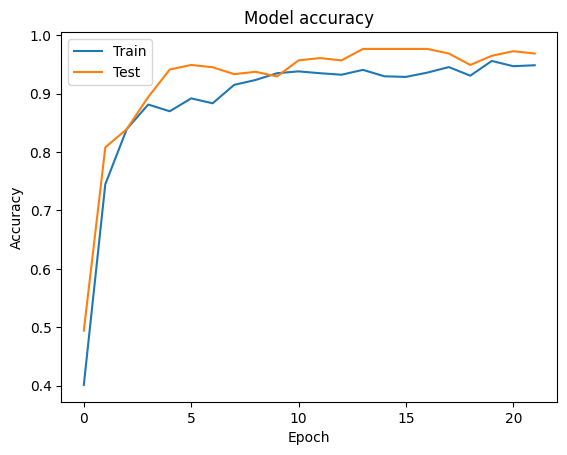

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_DenseNet169.history['accuracy'])
plt.plot(history_DenseNet169.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#Matriz de Confusión DenseNet169

Se puede observar que ha mejorado considerablemente la matriz de confusión respecto al modelo original y modelo con DA. la mayoria de las clases tienen un alto rendimiento en predicciones correctas.

Respecto al modelo de MOBILE se visualizar que ahora la clase que tiene mas problemas seria "Comida de perro" si consideramos como metrica f1 score como base.


8/8 [==============================] - 0s 46ms/step


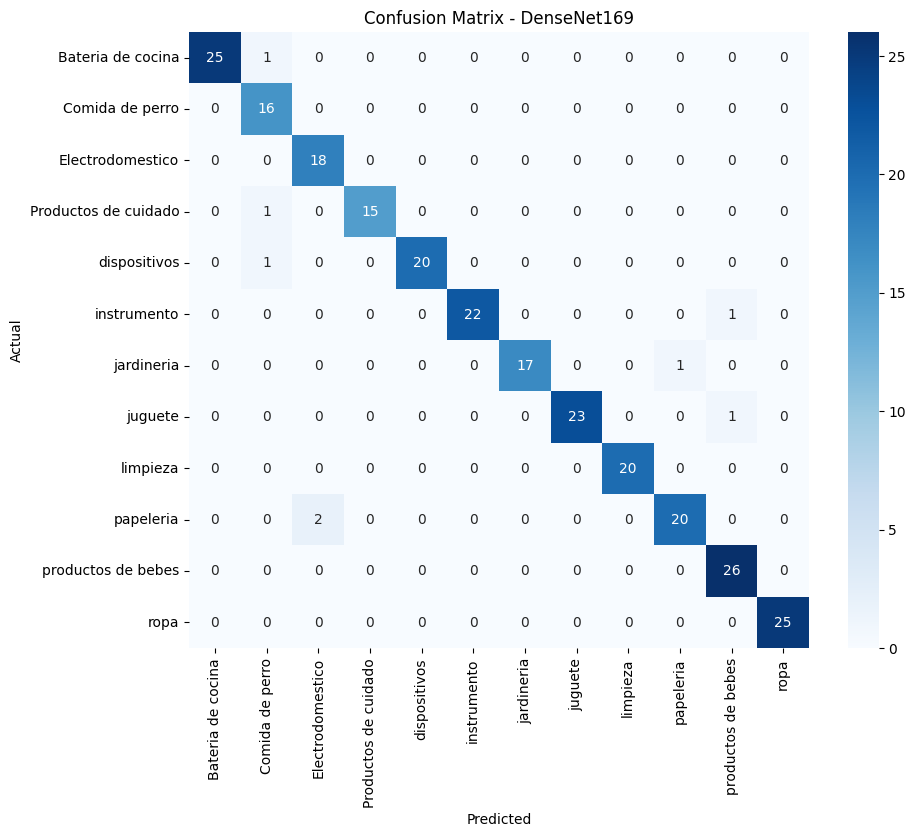

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en forma de clases (no one-hot encoded)
predicted_classes_dense = np.argmax(model.predict(X_test), axis=1)

# Obtener la matriz de confusión
confusion_mtx_dense = confusion_matrix(y_true, predicted_classes_dense)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx_dense, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - DenseNet169')
plt.show()


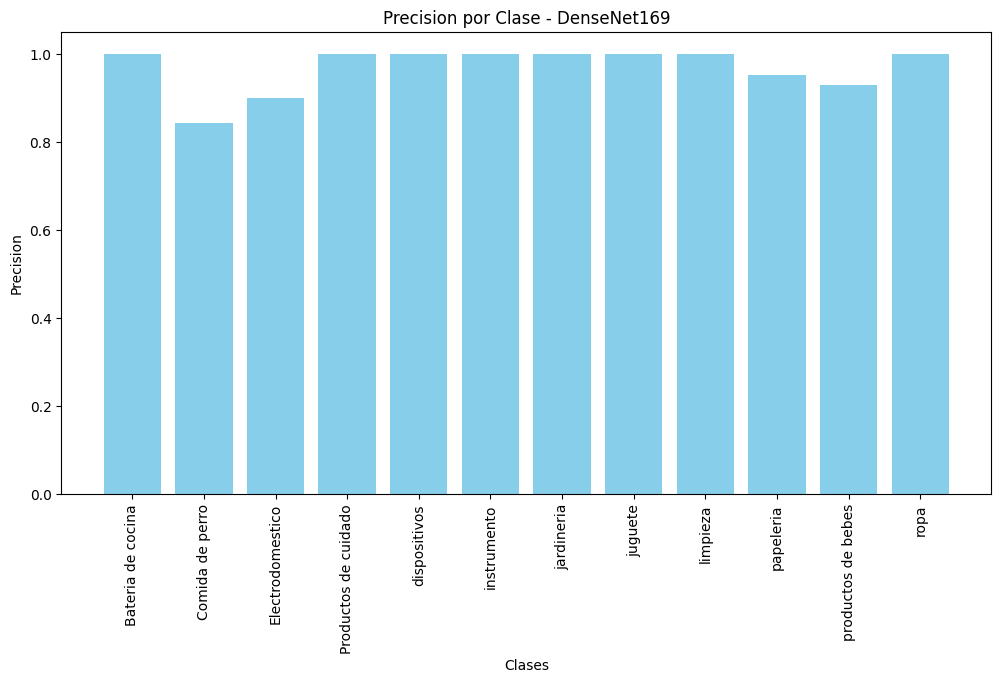

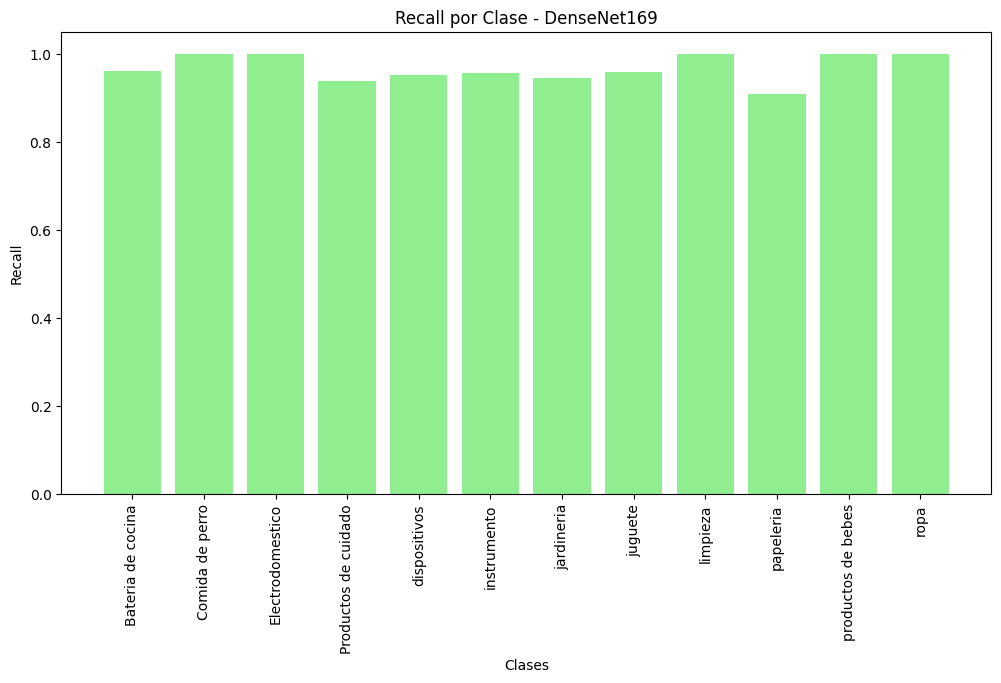

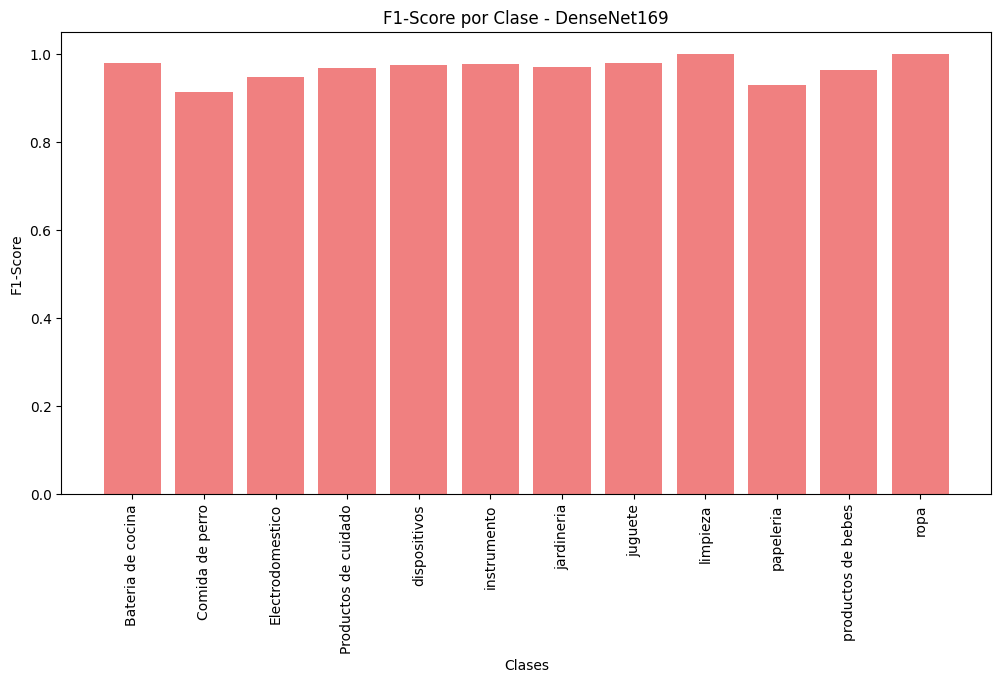

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

# Calcular precision, recall y f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, predicted_classes_dense, average=None)

# Etiquetas de las clases
labels = class_names

# Crear gráficos de barra para precision, recall y f1-score
x = np.arange(len(labels))  # La ubicación de las etiquetas en el eje x
width = 0.2  # El ancho de las barras

plt.figure(figsize=(12, 6))
plt.bar(class_names, precision, color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Precision')
plt.title('Precision por Clase - DenseNet169')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(class_names, recall, color='lightgreen')
plt.xlabel('Clases')
plt.ylabel('Recall')
plt.title('Recall por Clase - DenseNet169')
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(class_names, f1_score, color='lightcoral')
plt.xlabel('Clases')
plt.ylabel('F1-Score')
plt.title('F1-Score por Clase - DenseNet169')
plt.xticks(rotation='vertical')
plt.show()





Comentario y Análisis:

Densenet169 vs mobilenetV2


Densenet169 ha mostrado mejoras en las clases "Productos de cuidado" en 12 puntos, "Limpieza" en 5 puntos y "productos de bebe" en 1 punto, considerando como metrica f1-score. pero ha disminuido su rendimiento en todas las otras clases, dando como mejores resultados en el modelo preentrenado MobileNetV2 a pesar de tener la misma accuracy.



-----------
# 4. VGG19 (ImageNet)

Al utilizar VGG19 con weights='imagenet', se carga una versión de VGG19 que se ha entrenado en el conjunto de datos de ImageNet. Con el argumento include_top=False no se incluye la capa de salida original de VGG19, sino que se van agregando capas de salida personalizadas para adaptarse a este problema.

La arquitectura de las capas de salida personalizadas en conjunto con los hiperparametros se conforma de lo siguiente:

1)Capas Dropout (0.5) , ultima capa densa (salida = 12).

2)Learning Rate: learning rate del optimizador Adam a 0.001.

3)EarlyStopping: Se ha cambiado el EarlyStopping para monitorear la pérdida (val_loss) en lugar de la precisión (val_accuracy). Esto se debe a que la pérdida es una métrica más sensible y directa del rendimiento del modelo en problemas de clasificación. Con una paciencia de 5

4)Batch Size y Épocas: tamaño del lote (batch_size) a 32 y el número de épocas a 50.

5) Se utiliza DA como es solicitado

In [ ]:
from tensorflow.keras.applications import VGG19
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Cargar el modelo preentrenado VGG19 sin las capas superiores (top)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Crea un objeto ImageDataGenerator con transformaciones de Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rango de rotación aleatoria de las imágenes (en grados)
    width_shift_range=0.1,  # Rango de traslación horizontal aleatoria (como fracción del ancho total)
    height_shift_range=0.1,  # Rango de traslación vertical aleatoria (como fracción de la altura total)
    zoom_range=0.1,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    vertical_flip=False,  # No aplicar volteo vertical
    fill_mode='nearest'  # Estrategia utilizada para rellenar píxeles después de una transformación
)

# Genera imágenes aumentadas a partir de los datos de entrenamiento
augmented_data = datagen.flow(X_train, y_train_one_hot, batch_size=batch_size)


# Agregar capas adicionales para adaptar el modelo a tu problema
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.2)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)
x = Dense(1024, activation='relu')(x)
#x = BatchNormalization()(x)
#x = Dropout(0.3)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)
x = Dense(1024, activation='relu')(x)
#x = BatchNormalization()(x)
x = Dropout(0.5)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)

predictions = Dense(12, activation='softmax')(x)  # num_classes es el número de clases en tu problema

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas base del modelo preentrenado
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configurar EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    verbose=1
)

# Entrenar el modelo
history_VGG19 = model.fit(
    augmented_data,
    steps_per_epoch=len(X_train) // batch_size,  # Número de lotes por época
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test_one_hot),
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Epoch 1/50
15/15 [==============================] - 12s 671ms/step - loss: 2.5632 - accuracy: 0.1197 - val_loss: 2.3404 - val_accuracy: 0.3569
Epoch 2/50
15/15 [==============================] - 10s 653ms/step - loss: 2.2825 - accuracy: 0.2447 - val_loss: 2.0063 - val_accuracy: 0.4353
Epoch 3/50
15/15 [==============================] - 10s 680ms/step - loss: 1.7970 - accuracy: 0.3697 - val_loss: 1.2269 - val_accuracy: 0.6392
Epoch 4/50
15/15 [==============================] - 10s 648ms/step - loss: 1.4424 - accuracy: 0.4968 - val_loss: 1.1095 - val_accuracy: 0.6627
Epoch 5/50
15/15 [==============================] - 10s 670ms/step - loss: 1.2444 - accuracy: 0.5798 - val_loss: 0.9096 - val_accuracy: 0.6902
Epoch 6/50
15/15 [==============================] - 10s 657ms/step - loss: 1.0745 - accuracy: 0.6292 - val_loss: 0.8373 - val_accuracy: 0.7490
Epoch 7/50
15/15 [==============================] - 10s 668ms/step - loss: 0.9765 - accuracy: 0.6712 - val_loss: 0.6992 - val_accuracy: 0.7529

#Matriz de confusión
Podemos observar que el rendimiento respecto a los modelos anteriores ha bajado, teniendo mas falsos positivos.

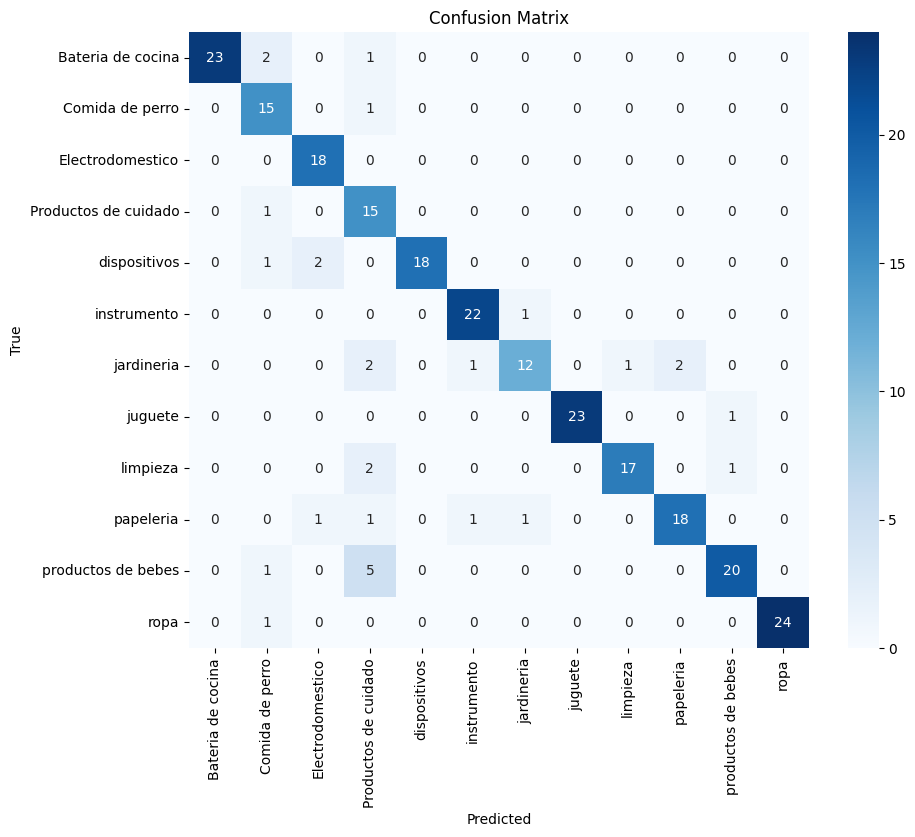

In [ ]:
# Generar y mostrar la matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Grafico de accuracy

Se puede observar el grafico de accuracy en el cual se presenta la curva de datos de entrenamiento como los de validación, el modelo indica que puede generalizar bien los datos y no se presenta un overffiting.

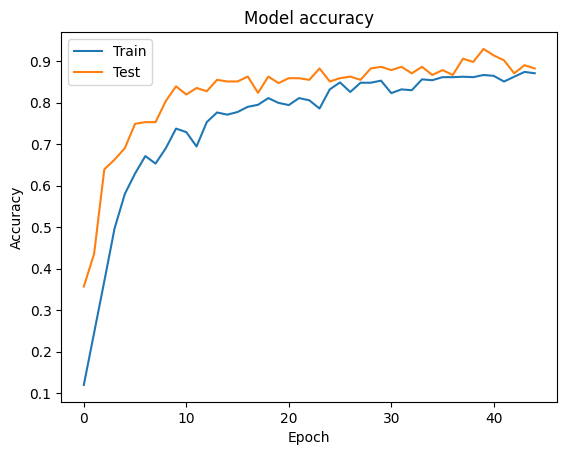

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_VGG19.history['accuracy'])
plt.plot(history_VGG19.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Metricas

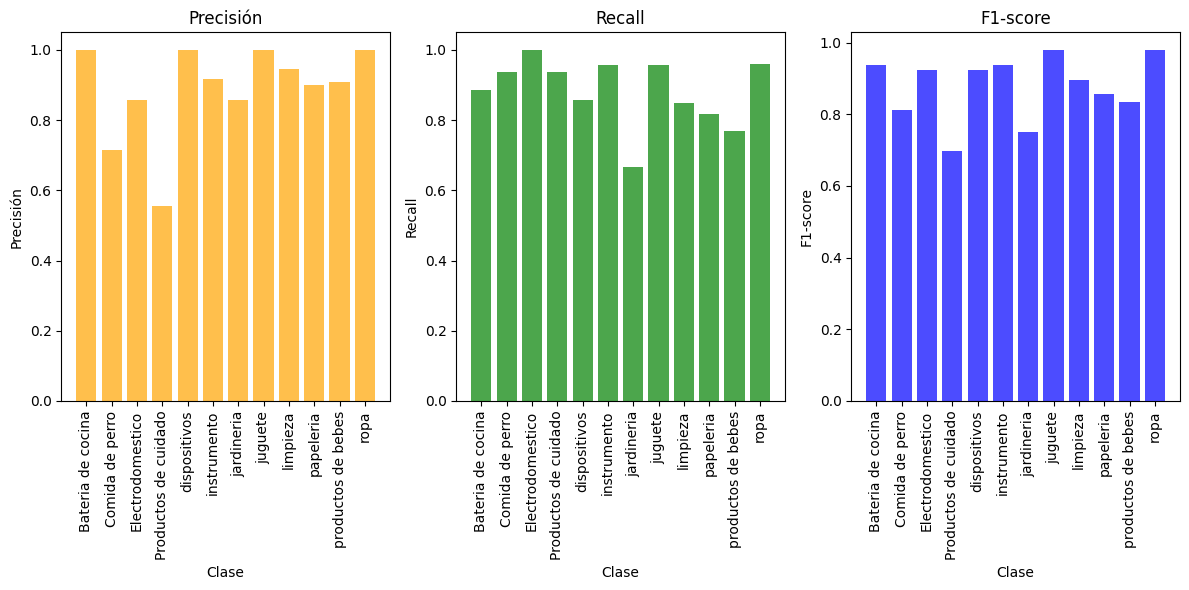

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)

# Obtener las métricas para cada clase
precision_values = [report[class_name]['precision'] for class_name in class_names]
recall_values = [report[class_name]['recall'] for class_name in class_names]
f1_score_values = [report[class_name]['f1-score'] for class_name in class_names]

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para precisión
plt.subplot(1, 3, 1)
plt.bar(class_names, precision_values, color='orange', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Precisión')
plt.title('Precisión')
plt.xticks(rotation='vertical')

# Gráfico de barras para recall
plt.subplot(1, 3, 2)
plt.bar(class_names, recall_values, color='green', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(rotation='vertical')

# Gráfico de barras para F1-score
plt.subplot(1, 3, 3)
plt.bar(class_names, f1_score_values, color='blue', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('F1-score')
plt.title('F1-score')
plt.xticks(rotation='vertical')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Comparación:

DenseNet169 supera a VGG19 en términos de precisión global (97% vs 88%)

DenseNet169 demuestra un mejor rendimiento en varias clases, especialmente en las categorías de Producto de cuidado, Jardineria, Productos de bebe.

VGG19 no supera en ninguna clase en temas de rendimiento, por lo cual el modelo DenseNet169 en completamente superior.

-------------
# 5. InceptionV3 (ImageNet)

Al utilizar InceptionV3 con weights='imagenet', se carga una versión de InceptionV3 que se ha entrenado en el conjunto de datos de ImageNet. Con el argumento include_top=False no se incluye la capa de salida original de InceptionV3, sino que se van agregando capas de salida personalizadas para adaptarse a este problema.

La arquitectura de las capas de salida personalizadas en conjunto con los hiperparametros se conforma de lo siguiente:

1)Capas Dropout (0.3 - 0.5) , ultima capa densa (salida = 12).

2)Learning Rate: learning rate del optimizador Adam a 0.001.

3)EarlyStopping: Se ha cambiado el EarlyStopping para monitorear la pérdida (val_loss) en lugar de la precisión (val_accuracy). Esto se debe a que la pérdida es una métrica más sensible y directa del rendimiento del modelo en problemas de clasificación. Con paciencia de 5

4)Batch Size y Épocas: tamaño del lote (batch_size) a 64 y el número de épocas a 50.

5) Se utiliza DA como es solicitado

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

# Cargar el modelo preentrenado InceptionV3 sin las capas superiores (top)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Crea un objeto ImageDataGenerator con transformaciones de Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Rango de rotación aleatoria de las imágenes (en grados)
    width_shift_range=0.1,  # Rango de traslación horizontal aleatoria (como fracción del ancho total)
    height_shift_range=0.1,  # Rango de traslación vertical aleatoria (como fracción de la altura total)
    zoom_range=0.1,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    vertical_flip=False,  # No aplicar volteo vertical
    fill_mode='nearest'  # Estrategia utilizada para rellenar píxeles después de una transformación
)

# Genera imágenes aumentadas a partir de los datos de entrenamiento
augmented_data = datagen.flow(X_train, y_train_one_hot, batch_size=batch_size)


# Agregar capas adicionales para adaptar el modelo a tu problema
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)# Tasa de dropout ajustable (aquí se usa 0.5 como ejemplo)

predictions = Dense(12, activation='softmax')(x)  # num_classes es el número de clases en tu problema

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas base del modelo preentrenado
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configurar EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=5,
    verbose=1
)

# Entrenar el modelo
history_InceptionV3 = model.fit(
    augmented_data,
    steps_per_epoch=len(X_train) // batch_size,  # Número de lotes por época,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test_one_hot),
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=class_names))


87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/50
15/15 [==============================] - 19s 819ms/step - loss: 1.9820 - accuracy: 0.4118 - val_loss: 1.3215 - val_accuracy: 0.5804
Epoch 2/50
15/15 [==============================] - 10s 660ms/step - loss: 0.6427 - accuracy: 0.8078 - val_loss: 0.9948 - val_accuracy: 0.7255
Epoch 3/50
15/15 [==============================] - 10s 653ms/step - loss: 0.5040 - accuracy: 0.8540 - val_loss: 0.4238 - val_accuracy: 0.8627
Epoch 4/50
15/15 [==============================] - 10s 681ms/step - loss: 0.3428 - accuracy: 0.8939 - val_loss: 0.2880 - val_accuracy: 0.9098
Epoch 5/50
15/15 [==============================] - 10s 675ms/step - loss: 0.3330 - accuracy: 0.9107 - val_loss: 0.6195 - val_accuracy: 0.8275
Epoch 6/50
15/15 [==============================] - 10s 661ms/step - loss: 0.2323 - accuracy: 0.9275 - val_loss: 0.4154 - val_accuracy: 0.9059
Epoch 7/50
15/15 [==============================] - 10s 663ms/step - loss: 0.

#Matriz de confusión

Respecto al modelo anterior el cual era VGG19, el modelo inceptionV3 ha mejorado en varias clases, disminuyendo falsos positivos, y un aumento en las predicciones correctas.

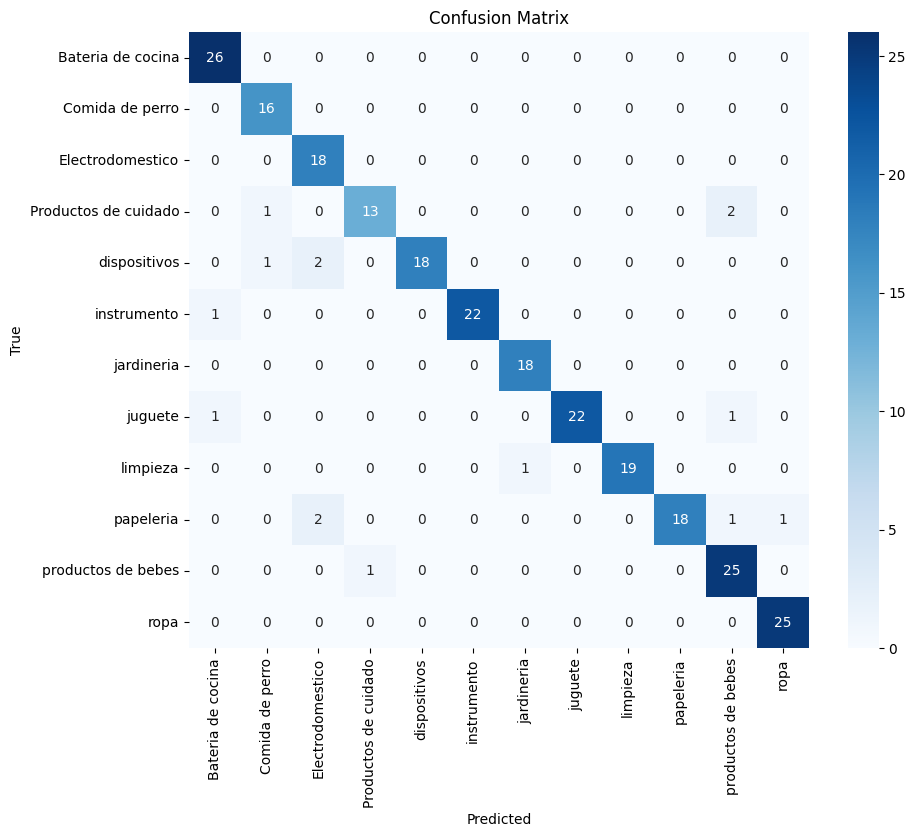

In [ ]:
# Generar y mostrar la matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Grafico accuracy

Se puede observar el grafico de accuracy en el cual se presenta la curva de datos de entrenamiento como los de validación, el modelo indica que puede generalizar bien los datos y no se presenta un overffiting.

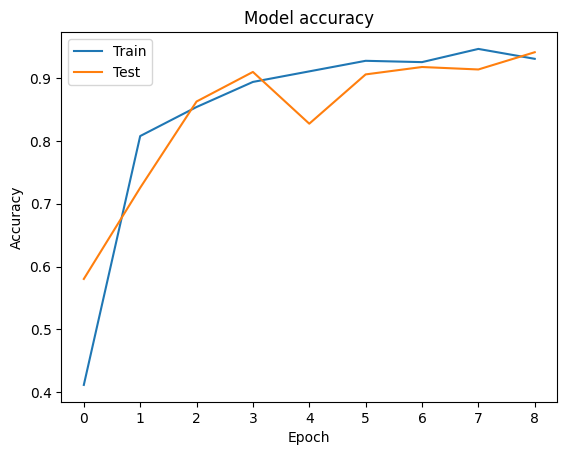

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_InceptionV3.history['accuracy'])
plt.plot(history_InceptionV3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Metricas.

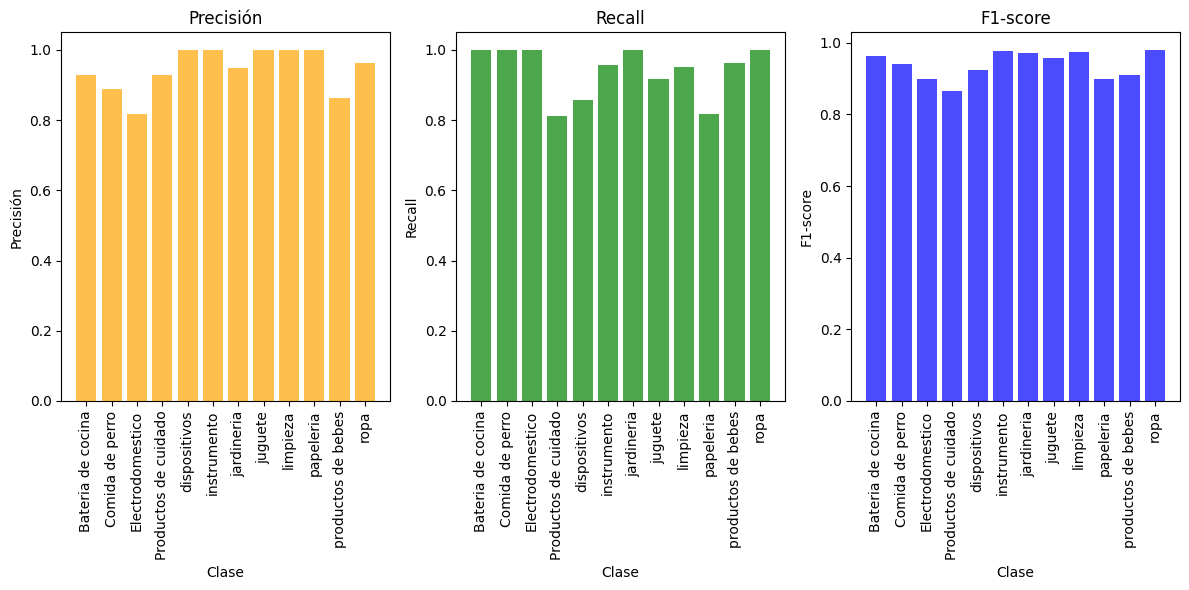

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)

# Obtener las métricas para cada clase
precision_values = [report[class_name]['precision'] for class_name in class_names]
recall_values = [report[class_name]['recall'] for class_name in class_names]
f1_score_values = [report[class_name]['f1-score'] for class_name in class_names]

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para precisión
plt.subplot(1, 3, 1)
plt.bar(class_names, precision_values, color='orange', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Precisión')
plt.title('Precisión')
plt.xticks(rotation='vertical')

# Gráfico de barras para recall
plt.subplot(1, 3, 2)
plt.bar(class_names, recall_values, color='green', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(rotation='vertical')

# Gráfico de barras para F1-score
plt.subplot(1, 3, 3)
plt.bar(class_names, f1_score_values, color='blue', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('F1-score')
plt.title('F1-score')
plt.xticks(rotation='vertical')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Comparación con Otros Modelos:

InceptionV3 supera a VGG19 en términos de precisión global (94% vs 88%).

InceptionV3 tiene un mejor rendimiento en varias clases en comparación con VGG19, especialmente en las categorías de Comida de perro con una diferencia de 13 puntos a favor, Productos de cuidado con 17 puntos a favor y jardineria con 22 puntos a favor para el modelo InceptionV3.


VGG19 supera en algunas clases en especifico pero con una diferencia minima como por ejemplo en: Electrodomesticos con 2 puntos a favor, Juguete con 2 puntos a favor.

En general, InceptionV3 muestra un rendimiento competitivo en comparación con VGG19.

------------
# 7. ResNet50 (ImageNet)

Al utilizar ResNet50 con weights='imagenet', se carga una versión de ResNet50 que se ha entrenado en el conjunto de datos de ImageNet. Con el argumento include_top=False no se incluye la capa de salida original de ResNet50, sino que se van agregando capas de salida personalizadas para adaptarse a este problema.

La arquitectura de las capas de salida personalizadas en conjunto con los hiperparametros se conforma de lo siguiente:

1)Capa Dropout (0.5) , ultima capa densa (salida = 12). (Es la arquitectura con menos capas respecto a los otros modelos, esto es debido a que esta ha sido la que ha entregado mejores resultados)

2)Learning Rate: learning rate del optimizador Adam a 0.0001.

3)EarlyStopping: Se ha cambiado el EarlyStopping para monitorear la pérdida (val_loss) en lugar de la precisión (val_accuracy). Esto se debe a que la pérdida es una métrica más sensible y directa del rendimiento del modelo en problemas de clasificación. Con paciencia de 10

4)Batch Size y Épocas: tamaño del lote (batch_size) a 64 y el número de épocas a 50.

5) Se utiliza DA como es solicitado

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Preprocesamiento de datos
datagen = ImageDataGenerator(
    rotation_range=20,  # Rango de rotación aleatoria de las imágenes (en grados)
    width_shift_range=0.1,  # Rango de traslación horizontal aleatoria (como fracción del ancho total)
    height_shift_range=0.1,  # Rango de traslación vertical aleatoria (como fracción de la altura total)
    zoom_range=0.1,  # Rango de zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    vertical_flip=False,  # No aplicar volteo vertical
    fill_mode='nearest'  # Estrategia utilizada para rellenar píxeles después de una transformación
)

# Genera imágenes aumentadas a partir de los datos de entrenamiento
augmented_data = datagen.flow(X_train, y_train_one_hot, batch_size=batch_size)

# Cargar el modelo preentrenado ResNet50 sin las capas superiores (top)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Agregar capas adicionales para adaptar el modelo a tu problema
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(12, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas base del modelo preentrenado
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configurar EarlyStopping para evitar overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# Entrenar el modelo
history_Resnet50 = model.fit(
    augmented_data,
    steps_per_epoch=len(X_train) // batch_size,  # Número de lotes por época,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test_one_hot),  # Datos de validación sin aumento
    callbacks=[early_stopping]
)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Imprimir el reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Epoch 1/50
15/15 [==============================] - 15s 763ms/step - loss: 2.7620 - accuracy: 0.1417 - val_loss: 2.5198 - val_accuracy: 0.0863
Epoch 2/50
15/15 [==============================] - 10s 674ms/step - loss: 2.2987 - accuracy: 0.2206 - val_loss: 2.4578 - val_accuracy: 0.1176
Epoch 3/50
15/15 [==============================] - 10s 681ms/step - loss: 2.1529 - accuracy: 0.3036 - val_loss: 2.4210 - val_accuracy: 0.2078
Epoch 4/50
15/15 [==============================] - 10s 695ms/step - loss: 1.9771 - accuracy: 0.3424 - val_loss: 2.3808 - val_accuracy: 0.2157
Epoch 5/50
15/15 [==============================] - 10s 666ms/step - loss: 1.9054 - accuracy: 0.3645 - val_loss: 2.3527 - val_accuracy: 0.2157
Epoch 6/50
15/15 [==============================] - 10s 670ms/step - loss: 1.8555 - accuracy: 0.3761 - val_loss: 2.3304 - val_accuracy: 0.2314
Epoch 7/50
15/15 [==============================] - 10s 659ms/step - loss: 1.8399 - accuracy: 0.4328 - val_loss: 2.2981 - val_accuracy: 0.2471

#Matriz de confusión

Se puede observar que se presentan problemas en casi todas las clases para hacer una correcta predicción, se presentan varios falsos positivos.

La clase con peor rendimiento seria productos de cuidado, tiene muchos problemas para detectar y predecir.

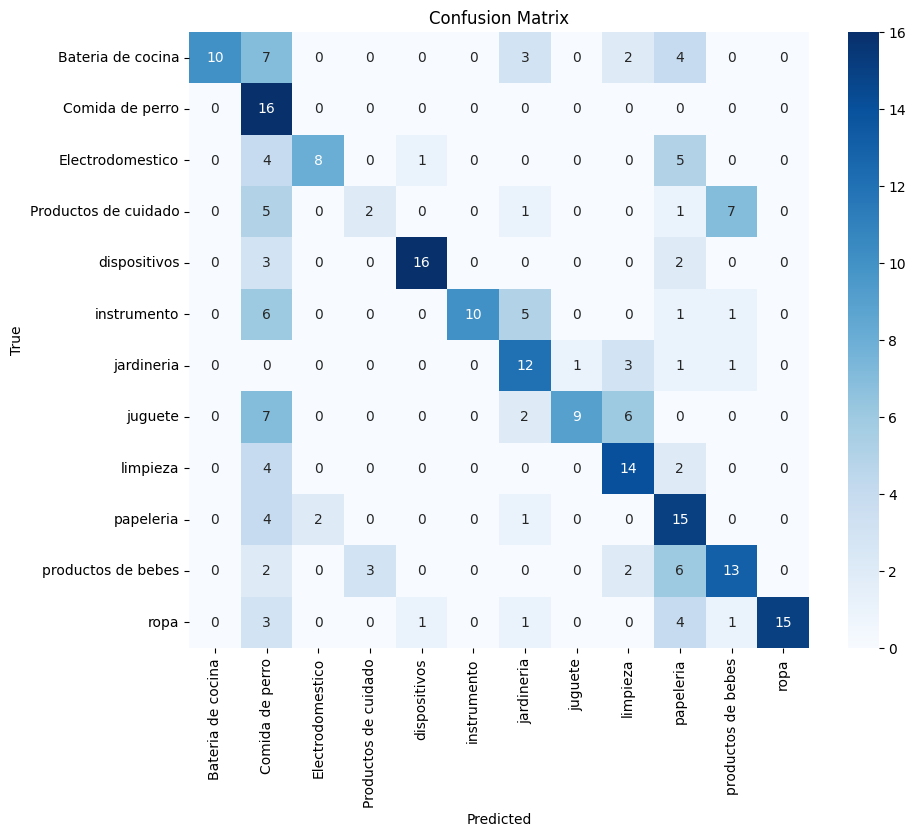

In [ ]:
# Generar y mostrar la matriz de confusión
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Grafico accuracy

Se puede observar el grafico de accuracy en el cual se presenta la curva de datos de entrenamiento como los de validación, el modelo indica que puede generalizar bien los datos y no se presenta un overffiting.

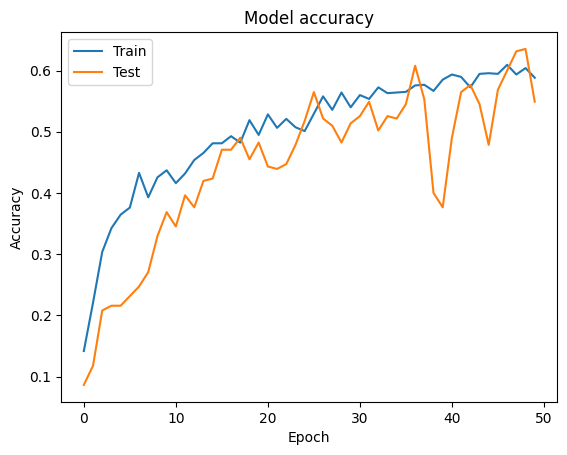

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_Resnet50.history['accuracy'])
plt.plot(history_Resnet50.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Metricas


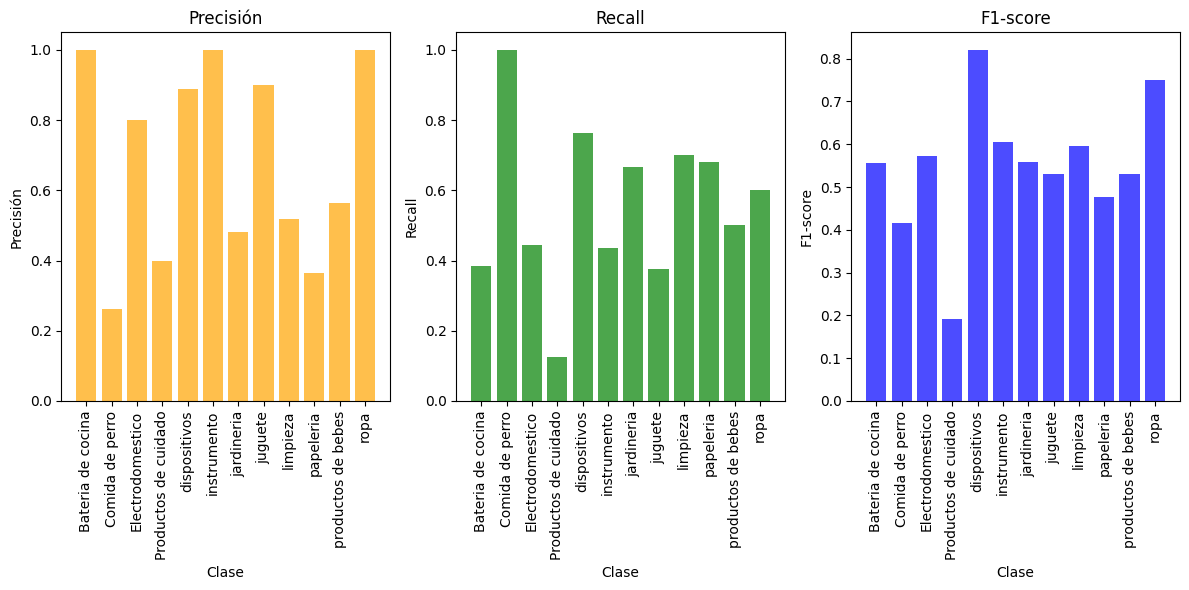

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)

# Obtener las métricas para cada clase
precision_values = [report[class_name]['precision'] for class_name in class_names]
recall_values = [report[class_name]['recall'] for class_name in class_names]
f1_score_values = [report[class_name]['f1-score'] for class_name in class_names]

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para precisión
plt.subplot(1, 3, 1)
plt.bar(class_names, precision_values, color='orange', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Precisión')
plt.title('Precisión')
plt.xticks(rotation='vertical')

# Gráfico de barras para recall
plt.subplot(1, 3, 2)
plt.bar(class_names, recall_values, color='green', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('Recall')
plt.title('Recall')
plt.xticks(rotation='vertical')

# Gráfico de barras para F1-score
plt.subplot(1, 3, 3)
plt.bar(class_names, f1_score_values, color='blue', alpha=0.7)
plt.xlabel('Clase')
plt.ylabel('F1-score')
plt.title('F1-score')
plt.xticks(rotation='vertical')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Se puede Observar que el rendimiento de todas las clases respecto a los modelos anteriores (modelos preentrenados) ha sido el que tiene peor rendimiento en terminos de puntos.

* Precisión: Rango desde 26% (Comida de perro) hasta 100% (Bateria de cocina)
* Recall: Rango desde 12% (Producto de cuidado) hasta 100% (Comida de perro)
* F1-score: Rango desde 19% (Producto de cuidado) hasta 82% Dispositivo

accuracy: 55%

La clase que mas equilibrio tiene seria dispositivo pero aun asi todos los modelos le sacan puntos.

IncepcionV3 vs Resnet (Dispositivos) : 10 puntos a favor de InceptionV3

VGG19 vs Resnet (Dipositivos): 10 puntos a favor de VGG19

DenseNet169 vs Resnet (Dispositivos) 16 puntos a favor de DenseNet169

MobileNetv2 vs Resnet (Dispositivos) 18 puntos a favor de MobileNetV2

-------------
# Analisis y conclusion.

MobileNetV2:

Rendimiento: MobileNetV2 demostró ser el mejor modelo en términos de precisión, recall y F1-score para varias clases, obteniendo un buen equilibrio entre precisión y exhaustividad.

Razón del Éxito: MobileNetV2 es una arquitectura de red neuronal profunda que permite una comunicación densa entre las capas, lo que facilita el aprendizaje de patrones complejos en los datos. Además, se benefició de un buen ajuste de hiperparámetros y una cantidad adecuada de datos de entrenamiento.


Recomendaciones para Mejorar el Rendimiento:

Calidad de los datos:

Se recomienda utilizar y mejorar la calidad de los datos con lo que se trabaja, esto incluye:

* Imagenes de mejor calidad
* Cantidad de datos
* Probar con nuevas tecnicas para mejorar los datos.
* Se sugiere explorar técnicas de regularización y ajuste fino de otros modelos pre-entrenados para evaluar su impacto en el rendimiento del modelo.


Seguir en busqueda de mejores hiperparametros: incluye tasa de aprendizaje, dropout, tamaño de lote o cualquier otro parametro relevante.

Se recomienda estudiar las clases que tienen peor rendimiento en este caso Productos de cuidado el cual se presenta con el peor desempeño en varios modelos.



